<div style="display: flex; align-items: center;">
    <img src="https://github.com/angeloBuso/ppca-dados-massivos/blob/main/dados/UNB-logo.png?raw=true" alt="UNB logo" width="180" style="margin-right: 10px;">
    <h1>Programa de Pós-graduação em Computação Aplicada – PPCA (UnB)</h1>
</div>

<h2>Análise Estatística de Dados e Informações</h2>

<h5>Professor: João Gabriel de Moraes Souza</h5>
<h5>Aluno: <a href="https://tr.ee/On58b8WbPz" target="_blank">Angelo Donizete Buso Júnior</a></h5>

## **1. Compreensão do Problema de Negócio** *(Business Understanding)*

A **retenção de clientes** é uma das questões mais importantes que as empresas enfrentam. A **prevenção da evasão de clientes** (*customer churn prevention*) faz parte das estratégias essenciais de **gestão do relacionamento com o cliente** (*CRM*). Empresas de diversos setores, incluindo o bancário, têm investido no desenvolvimento de **modelos preditivos de churn** para detectar a probabilidade de perda de clientes antes mesmo que ela ocorra, permitindo ações preventivas direcionadas.

<p align=center>
<img src="https://marketup.com/wp-content/uploads/2021/10/vazou-1.jpg" width="100%">
</p>

A métrica de **Churn Rate** (taxa de evasão) é crucial para as decisões estratégicas das empresas, pois reflete a **quantidade de clientes perdidos** (a) em comparação com a base total de clientes (b), em um determinado período de tempo (c). A fórmula é dada por **(a)/(b)**. Portanto, quanto menor essa taxa, melhor para a empresa, uma vez que a perda de clientes implica em custos adicionais para a aquisição de novos.

A análise dessa métrica ao longo do tempo pode revelar problemas estruturais, como a insatisfação do cliente ou falhas nos serviços, que devem ser resolvidos. Ao associarmos o conceito de *churn* com **(i) ciência computacional, (ii) matemática, (iii) estatística e (iv) dados históricos** de clientes que permaneceram ou saíram, podemos prever os potenciais cancelamentos de forma antecipada, permitindo que estratégias de retenção sejam implementadas de maneira mais eficaz.

O uso de **modelos preditivos baseados em aprendizado de máquina (ML)** justifica-se pelo fato de que o **Custo de Aquisição de Clientes (CAC)** costuma ser significativamente mais alto do que o custo de manter clientes existentes. Em outras palavras, **reduzir churn e reter clientes** resulta em **maiores receitas** e **menores custos operacionais**.

Neste contexto, aplicaremos **Inteligência Artificial** para detectar as probabilidades de cancelamento de serviços. Usaremos (a) uma base de dados histórica, (b) algoritmos de aprendizado de máquina e (c) as boas práticas da Ciência de Dados para construir uma ferramenta preditiva capaz de identificar clientes em risco de cancelamento. Nosso objetivo é fornecer ao banco ferramentas para agir de forma proativa na retenção de clientes e melhorar a experiência do cliente com a instituição.

Para a tarefa, utilizaremos dados históricos de clientes de uma instituição bancária, o que permitirá prever a probabilidade de um cliente abandonar o banco e buscar alternativas em outras instituições financeiras.


In [94]:
# Análise de Dados e Visualização**
import pandas as pd               # Manipulação de dados
import numpy as np                # Operações numéricas
import matplotlib.pyplot as plt   # Visualização gráfica
import seaborn as sns             # Visualização gráfica avançada
from scipy import stats           # Estatísticas e testes estatísticos

# Pré-Processamento de Dados**
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Normalização e codificação
from imblearn.under_sampling import RandomUnderSampler          # Balanceamento (undersampling)
from imblearn.over_sampling import SMOTE                        # Balanceamento (oversampling)
from collections import Counter                                 # Contagem de classes
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF para multicolinearidade

# Algoritmos de Machine Learning**
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.svm import SVC                          # Support Vector Machine (SVM)

# Bibliotecas para Treinamento e Validação**
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold  # Divisão de dados e validação cruzada

# Avaliação de Modelos**
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)  # Métricas de avaliação
from scikitplot.metrics import plot_confusion_matrix, plot_roc  # Visualização de métricas

# Ignorar Warnings**
import warnings
warnings.filterwarnings("ignore")

# Verificação das Versões das Bibliotecas**
print("Versão do Seaborn:", sns.__version__)
print("Versão do Pandas:", pd.__version__)


Versão do Seaborn: 0.13.2
Versão do Pandas: 2.2.3


### **1.1 Dicionário de Dados**


#### Informações sobre os atributos:

1. RowNumber        -> Número da linha no dataset.
2. CustomerId       -> Identificador único do cliente.
3. Surname          -> Sobrenome do cliente.
4. CreditScore      -> Pontuação de crédito do cliente. Valores numéricos que indicam a confiabilidade financeira.
5. Geography        -> País de residência do cliente (por exemplo, França, Alemanha, Espanha).
6. Gender           -> Gênero do cliente (Masculino ou Feminino).
7. Age              -> Idade do cliente em anos.
8. Tenure           -> Número de anos que o cliente mantém uma conta no banco.
9. Balance          -> Saldo na conta bancária do cliente.
10. NumOfProducts   -> Número de produtos bancários que o cliente utiliza (por exemplo, conta corrente, poupança, empréstimos).
11. HasCrCard       -> Indica se o cliente possui um cartão de crédito. Valores binários (1 = Sim, 0 = Não).
12. IsActiveMember  -> Indica se o cliente é um membro ativo. Valores binários (1 = Sim, 0 = Não).
13. EstimatedSalary -> Salário estimado anual do cliente.
14. Exited          -> Variável **alvo** que indica se o cliente deixou o banco. Valores binários (1 = Sim, o cliente saiu; 0 = Não, o cliente permaneceu).

## **2. Coleta Dados**

Como todo projeto de *machine learning* a matéria-prima são **dados**, utilizaremos uma coleção de informações catalogadas e disponibilizados no [Kaggle](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?resource=download).


Esses dados tratam de um problema típico de empresas que prestam serviçoes, financeiros ou não. Incluem informações sobre:

Clientes que saíram do banco -> coluna `Exited`, nossa variável target. É o que queremos que o modelo de *Machine Learning* aprenda e preveja.

Serviços financeiros que cada cliente utiliza -> colunas `NumOfProducts` (número de produtos bancários contratados), `HasCrCard`(se possui cartão de crédito) e `IsActiveMember` (se é um membro ativo do banco).

Informações sobre a conta bancária do cliente -> colunas `Balance` (saldo da conta), `EstimatedSalary` (salário estimado), e `Tenure` (famoso "cliente desde" – número de anos como cliente).

Informações demográficas sobre os clientes -> colunas `Gender_Male` (gênero do cliente), `Age` (idade do cliente), e `Geography` (localização geográfica do cliente, como França, Alemanha ou Espanha).

Essas informações permitem identificar padrões de comportamento que pode explicar se um cliente a permanece ou sai do banco, facilitando a construção de estratégias de retenção.



**Dicas:**  
1. Observar as extensão do arquivo dataSet.
2. Verificar os acessos aos dataSet (LGPD).
3. "Timeframe" dos dados (desde quando tem-se os dados).
4. Valores Missing (será substituido por default ou outro valor - média, por exemplo).
5. Cabeçalho (header=T), caso False, irá indicar cabeçalho.
6. Dados possuem algum comentário.
7. Possui delimitador os dados.

### **2.1 Carga dados**

**Dicas:**  

(i) Observar as extensão do arquivo dataSet;

(ii) Verificar os acessos aos dataSet;

(iii) "Timeframe" dos dados (desde quando tem-se os dados);

(iv) Valores Missing (será substituido por default ou outro valor - média, por exemplo);

(v) Cabeçalho (header=T), caso False, irá indicar cabeçalho;

(vi) Dados possuem algum comentário;

(vii) Possui delimitador os dados;

(viii) Até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel). Acima 3 dim NUMPY (nparray).

In [2]:
path = "/home/buso/mestrado/aedi-ppca/dados/Churn_Modelling.csv"
df = pd.read_csv(path)
print('Os dados possuem {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))
df.head()

Os dados possuem 10000 linhas e 14 colunas


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **3. Análise Exploratória**


### 3.1 Visão Geral dataSet
Nesta estapa estamos interessados em entender melhor a pergunta ***"Quais tipos de dados tem no nosso dataSet?"***
* Tipo Objeto que estamos trabalhando
* Tipos Dados
* Shape - Dimensionalidade
* Índices
* Descrição dos dados

In [3]:
def visaogeral(df, mensagem):
    print(f'{mensagem}:\n')
    print("Qtd Observações:", df.shape[0])
    print("\nQtd Atributos:", df.shape[1])
    print("\nAtributos:")
    print(df.columns.values)
    # print(df.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Unicos:")
    print(df.nunique())

In [4]:
visaogeral(df,'Visão Geral do dataSet')

Visão Geral do dataSet:

Qtd Observações: 10000

Qtd Atributos: 14

Atributos:
['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']

Qtd Valores missing: 0

Valores Unicos:
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


O conjunto de dados possui **10.000 observações** e **14 atributos**, sem valores ausentes (*missing*). Os atributos incluem dados demográficos, históricos financeiros e indicadores comportamentais. Abaixo, destacamos os atributos categóricos e quantitativos:

- **Atributos categóricos**: Adotaremos como premissa o fato de possuirem até 4 ou 5 valores únicos, indicando que podem representar categorias:
  - `Geography` (3 valores únicos): País de residência.
  - `Gender` (2 valores únicos): Gênero do cliente.
  - `NumOfProducts` (4 valores únicos): Número de produtos bancários utilizados.
  - `HasCrCard` (2 valores únicos): Indica posse de cartão de crédito.
  - `IsActiveMember` (2 valores únicos): Indica se o cliente é ativo no banco.
  - `Exited` (2 valores únicos): Variável alvo, indicando se o cliente saiu ou permaneceu.

- **Atributos quantitativos**: Incluem variáveis numéricas contínuas, como `CreditScore` (460 valores únicos), `Balance` (6.382 valores únicos) e `EstimatedSalary` (9.999 valores únicos), que serão analisados como variáveis independentes no modelo preditivo. Os atributos `Age`, `Tenure` e `CreditScore`, *a priori* demonstra ser *features* numéricas discretas, sendo que após o processo de exploração dos dados (EDA) seja interessante realizar algumas trasformaões em categórias nelas.

Nosso objetivo é realmente entender se esses formatos representam a **informação** que a *feature* precisa passar!

Essa combinação de atributos categóricos e quantitativos é fundamental para capturar os diferentes fatores que influenciam a probabilidade de churn dos clientes.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


A partir da análise exploratória realizada, já é possível ter uma **compreensão situacional** sobre o conjunto de dados. O dataset contém **10.000 registros** de clientes, com informações que indicam se eles permaneceram ou saíram do banco.

A coluna **`CustomerId`**, devido à sua nomenclatura e à alta quantidade de valores únicos, funciona como um **identificador exclusivo de cada cliente** e não possui valor preditivo. Por isso, será excluída do modelo. A coluna **`RowNumber`** apresenta características semelhantes, funcionando como um contador das linhas do dataset, e também será removida.

A análise de valores únicos revelou a presença de variáveis **categóricas**, o que indica a necessidade de aplicar técnicas de **codificação de variáveis**, como a criação de **variáveis dummies** (*One-Hot Encoding*), para que possam ser utilizadas pelo modelo de machine learning.

Outro aspecto positivo é que o dataset **não apresenta valores ausentes** nesta fase inicial. No entanto, é importante ressaltar que, durante o processo de **engenharia de atributos** (*feature engineering*) e **transformação de variáveis**, podem surgir valores nulos em decorrência de operações como discretização, normalização ou criação de novas variáveis. 

Portanto, será essencial **monitorar e tratar** esses valores ausentes de maneira adequada para garantir a **qualidade e integridade dos dados**, assegurando um bom desempenho do modelo preditivo.


**TRADE-OFF's da Ciência de Dados!**

Se o número de **linhas/observações** no seu arquivo for **muito grande**, o algoritmo pode levar **muito tempo** para ser **treinado**. Se o número de **registros for muito pequeno**, você pode não ter registros suficientes para treinar seu modelo (**underfitting**- decora ponto dos dados).

Se você tiver **muitas colunas/atributos** em seu arquivo, o algoritmo pode apresentar problemas de performance devido a **alta dimensionalidade**.

A melhor solução vai depender de cada caso. Mas lembre-se: **treine** seu modelo em um subset do seu conjunto de dados maior **(70% treino)** e depois aplique o modelo a novos dados **(30% teste)** para verificar a performance. Uma boa prática é ter uma massa de dados para **validação durante o treinamento**.


Se o número de linhas/observações no seu conjunto de dados for muito grande, o treinamento do modelo pode ser demorado, especialmente para algoritmos mais complexos. Nesse caso, técnicas como amostragem representativa, processamento distribuído (ambientes paralelizados) ou redução de dimensionalidade podem ajudar. Por outro lado, se o número de registros for muito pequeno, o modelo pode não capturar padrões gerais, levando a underfitting (quando o modelo "simplesmente decora" os pontos do conjunto de dados sem aprender generalizações úteis).

Além disso, ter muitas colunas/atributos pode causar problemas de alta dimensionalidade, dificultando o aprendizado do modelo e aumentando o risco de overfitting (quando o modelo se ajusta demais aos dados de treino, perdendo capacidade de generalizar). Métodos como seleção de características ou redução de dimensionalidade (ex.: PCA) são úteis para mitigar esses problemas.

A prática recomendada é dividir o conjunto de dados em treino (70%) e teste (30%), para avaliar o modelo em dados novos. Além disso, durante o treinamento, é importante usar uma massa de dados para validação (ex.: validação cruzada), garantindo que o modelo não dependa apenas de uma única divisão de dados e tenha boa capacidade de generalização.

Em resumo, a melhor solução varia conforme o problema, mas a análise cuidadosa do tamanho e da complexidade dos dados é essencial para treinar um modelo eficiente e confiável.

Observando uma amostra inicial e uma amostra final do dataSet.

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Relembrando o shape dos dados:

In [8]:
print('Os dados possuem {:.2f} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

Os dados possuem 10000.00 linhas e 14 colunas


In [9]:
# checando índice (endereço de cada obs) e sua distribuição
df.index

RangeIndex(start=0, stop=10000, step=1)

In [10]:
# checando os nomes das colunas
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### **3.1.1 Variáveis Explicatórias e Variável Alvo**

Para a construção do modelo preditivo, é fundamental separar as variáveis do conjunto de dados em dois grupos distintos:

- **Variável Alvo (`y`)**: Representa o resultado que desejamos prever. No contexto deste estudo, a variável alvo é a **`Exited`**, que indica se o cliente deixou o banco (**1**) ou permaneceu (**0**). Essa variável será utilizada para treinar o modelo e avaliar sua capacidade de prever a evasão de clientes.

- **Variáveis Explicatórias (`X`)**: São as demais variáveis que contêm informações relevantes sobre o comportamento e perfil dos clientes. Elas serão utilizadas como **fatores preditivos** para estimar a probabilidade de churn. Antes do treinamento, variáveis que não contribuem para a previsão, como **`CustomerId`**, **`RowNumber`** e **`Surname`**, serão excluídas por não apresentarem valor preditivo.

A separação correta entre **`X`** e **`y`** é essencial para garantir que o modelo aprenda a partir de variáveis relevantes e seja capaz de realizar previsões precisas sobre a saída ou permanência dos clientes.

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X_churn = df.drop(columns= 'Exited', axis= 1)
y_churn = df.Exited

In [13]:
y_churn.shape

(10000,)

In [14]:
print('DataSet original com {} atributos e {} observações'.format(df.shape[1], df.shape[0]))
print('As Variáveis Explicatórias possuem {} atributos e {} observações'.format(X_churn.shape[1], X_churn.shape[0]))
print('A Variável Alvo possuem {} observações'.format(y_churn.shape))

DataSet original com 14 atributos e 10000 observações
As Variáveis Explicatórias possuem 13 atributos e 10000 observações
A Variável Alvo possuem (10000,) observações


#### **3.1.2 Variável Alvo**

A **variável alvo** deste estudo é o atributo **`Exited`**, que indica se o cliente encerrou ou não seu relacionamento com o banco. Essa variável é categórica binária e representa o resultado que o modelo de machine learning deve prever. Seus valores são definidos da seguinte forma:

- **0** → O cliente **permaneceu** no banco.  
- **1** → O cliente **deixou** o banco (*churn*).

#####  3.1.2.1  Amplitude

In [15]:
y_churn.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [16]:
y_churn.unique()

array([1, 0])

Observando os valores únicos da variável **`Exited`**, confirmamos que se trata de uma **variável categórica binária**, com duas categorias distintas:

- **0** → Não houve **churn**, o cliente **permaneceu** no banco.  
- **1** → Houve **churn**, o cliente **encerrou** seu relacionamento com o banco.

Dessa forma, estamos diante de um problema de **aprendizado supervisionado** do tipo **classificação**, no qual o objetivo é prever a probabilidade de um cliente deixar ou não a instituição financeira.

Para essa tarefa, utilizaremos um **modelo classificador**, que será treinado para identificar padrões de comportamento associados ao churn e, assim, antecipar a evasão de clientes.

##### **3.1.2.2 Balanceamento dos Dados**

Em problemas de **classificação**, é frequente encontrar conjuntos de dados com **classes desbalanceadas**, onde uma das classes apresenta um número de registros significativamente maior do que a outra. Esse desequilíbrio pode comprometer o desempenho do modelo, tornando-o **tendencioso** para a classe majoritária e dificultando a correta identificação da classe minoritária.

O **balanceamento das classes** é um dos **pressupostos fundamentais** a serem considerados na construção de modelos de **machine learning**. Caso não seja tratado adequadamente, o modelo pode apresentar baixa capacidade de prever eventos menos frequentes, como o **churn** de clientes. Por isso, é essencial adotar estratégias para equilibrar as classes durante o pré-processamento, garantindo previsões mais precisas e confiáveis.

In [17]:
print(y_churn.value_counts())
print("\nObserva-se que {:.4f}% do dataSet realizaram churn.".format((df.groupby('Exited').size()[1] / df.shape[0])*100))
print("Enquanto que {:.4f}% dos dados não realizaram churn.".format((df.groupby('Exited').size()[0] / df.shape[0])*100))

Exited
0    7963
1    2037
Name: count, dtype: int64

Observa-se que 20.3700% do dataSet realizaram churn.
Enquanto que 79.6300% dos dados não realizaram churn.


No contexto deste estudo, a variável **`Exited`** apresenta desbalanceamento, com a maioria dos clientes permanecendo no banco (**classe 0**) e uma minoria encerrando o relacionamento (**classe 1**). Esse cenário pode levar o modelo a prever majoritariamente a permanência dos clientes, negligenciando a identificação de clientes em risco de churn.

Para mitigar esse problema, existem técnicas de **balanceamento de classes**, como por exemplo:

- **Oversampling (Superamostragem)**: Aumentar a quantidade de registros da classe minoritária por meio da duplicação de dados ou geração de novas amostras sintéticas, como a técnica **SMOTE** (*Synthetic Minority Over-sampling Technique*).  
- **Undersampling (Subamostragem)**: Reduzir a quantidade de registros da classe majoritária, eliminando amostras redundantes para equilibrar a proporção entre as classes.  

A escolha adequada da técnica de balanceamento é fundamental para garantir que o modelo preditivo tenha uma **boa performance** e consiga identificar com precisão os clientes que possuem maior probabilidade de evasão.

#####  3.1.2.3  Plots Variável Alvo

In [18]:
%matplotlib inline
# seto algumas caracteristicas para os plots. Padornizar Plots
sns.set_theme(style='darkgrid')
sns.set_palette("hls", 3)

In [19]:
balData = pd.DataFrame(df.Exited.value_counts())
balData['% total'] = round(100*balData['count']/df.shape[0], 2)

        count  % total
Exited                
0        7963    79.63
1        2037    20.37


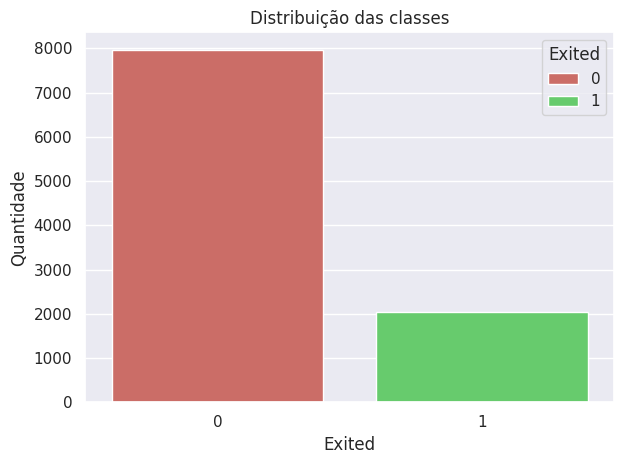

In [20]:
print(balData)
churn_plot = sns.countplot(data=df, x='Exited', order=df.Exited.value_counts().index, hue= 'Exited')

plt.title('Distribuição das classes')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()

#### **3.1.3 Preditores Categóricos**

Durante a análise exploratória, identificamos que o conjunto de dados contém variáveis **potencialmente categóricas**, que desempenham um papel importante na previsão de churn. Variáveis categóricas são aquelas que representam **categorias discretas** em vez de valores numéricos contínuos. Elas são fundamentais para capturar padrões de comportamento e preferências dos clientes.

Para facilitar a análise e a visualização dessas variáveis, realizaremos uma **divisão do dataset** com base no tipo de variável, permitindo a criação de **gráficos mais representativos** e a identificação de possíveis **viéses** nas categorias.

As principais variáveis categóricas identificadas são:
- **`Geography`**: País de residência do cliente (França, Alemanha, Espanha).  
- **`Gender`**: Gênero do cliente (Masculino ou Feminino).  
- **`NumOfProducts`**: Quantidade de produtos bancários contratados (1 a 4).  
- **`HasCrCard`**: Indica se o cliente possui cartão de crédito (1 = Sim, 0 = Não).  
- **`IsActiveMember`**: Indica se o cliente é um membro ativo (1 = Sim, 0 = Não).  

Para preservar a integridade do conjunto de dados original, criaremos uma **cópia do dataset** e removeremos variáveis que não contribui para a análise preditiva.

Com essa abordagem, avançaremos para a construção de **gráficos exploratórios** que ajudarão a compreender melhor o comportamento dessas variáveis categóricas em relação ao churn.

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#####  3.1.3.1 Plots dos Preditores Categóricos

In [22]:
df_graph = df.copy()
df_graph.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace= True)
print("dados originais \t", df.shape)
print("dados para gráficos \t", df_graph.shape)

dados originais 	 (10000, 14)
dados para gráficos 	 (10000, 11)


In [23]:
categoricas = [coluna for coluna in df_graph.select_dtypes(['object']).columns.tolist() if coluna != 'Exited']

Essas são as variáveis categóricas com tipo de dado **string**, ou seja, com o nome das categorias que as representa.

In [24]:
categoricas

['Geography', 'Gender']

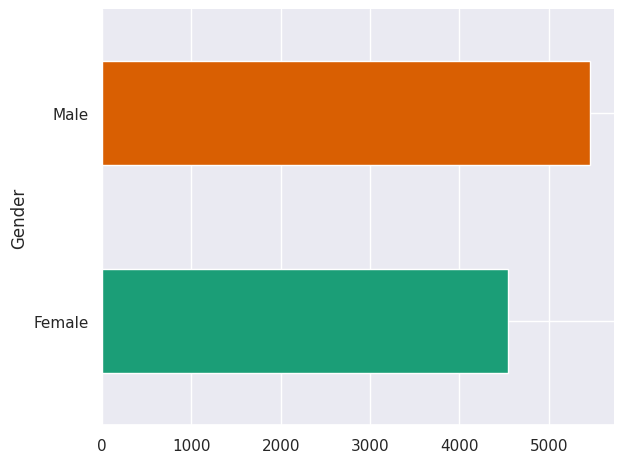

In [25]:
df_graph.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

In [26]:
df_graph['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

##### **⚠️ Atenção: Possibilidade de *Bias* em Variáveis**

Em problemas de **machine learning**, algumas variáveis podem introduzir **viés** (*bias*) nos dados, afetando a imparcialidade e a performance do modelo. Esse viés pode ocorrer devido a distribuições desbalanceadas ou representações inadequadas de determinados grupos.

A variável **`Gender`**, que indica o gênero dos clientes com as categorias **`Female`** e **`Male`**, deve ser cuidadosamente analisada para evitar qualquer tipo de **enviesamento** relacionado ao gênero. Uma análise da distribuição dessa variável é essencial para garantir que o modelo não favoreça ou prejudique um grupo específico.

Após a análise, observamos que a variável **`Gender`** apresenta uma **distribuição equilibrada** entre os gêneros, o que reduz o risco de viés nessa variável. O conjunto de dados é composto por aproximadamente **5.400 clientes do sexo masculino** e **4.500 clientes do sexo feminino**, o que representa uma diferença não significativa entre as classes.

Embora a variável esteja balanceada, é importante monitorar o impacto dessa e de outras variáveis ao longo do processo de modelagem para assegurar a **imparcialidade** e a **robustez** do modelo preditivo.

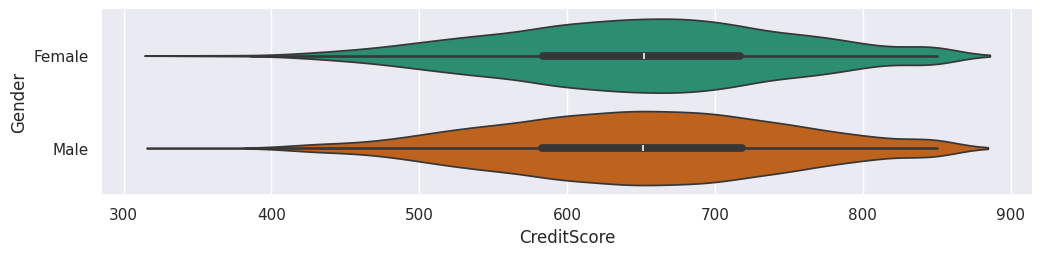

In [27]:
figsize = (12, 1.2 * len(df_graph['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_graph, x='CreditScore', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Realizando uma análise da risco de crédito `CrediScore` dessa instituição financeiro pela variável `Gender`, estatisticamente identificamos uma distribuição similar entre os 2 valores da variável `Gender`.

Ambos os gêneros têm a maior concentração de pontuações entre 600 e 700.

A linha branca central em cada violino representa a mediana do CreditScore, e ambas estão próximas, indicando pouca diferença entre os gêneros.

Tanto para homens quanto para mulheres, a pontuação de crédito varia aproximadamente entre 300 e 850, sem grandes discrepâncias.

Para ambos os gêneros, a densidade é maior entre 600 e 700, sugerindo que a maioria dos clientes possui pontuações nessa faixa.

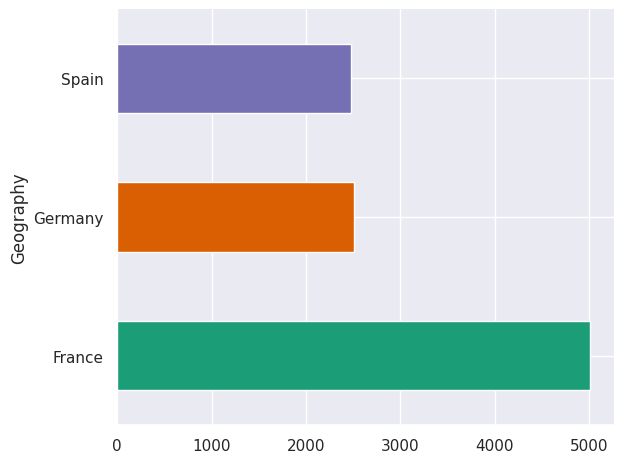

In [28]:
df_graph.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

In [29]:
df_graph['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Observa-se que a instituição financeira atua em 3 países, com uma concentração de clientes na França, seguido por Alemanha e Espanha.

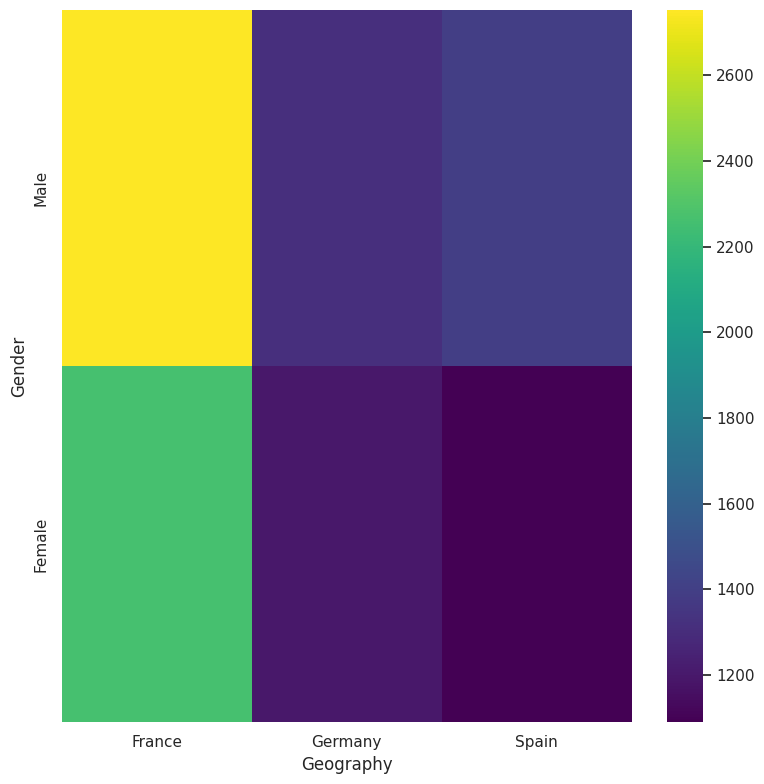

In [30]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in df.groupby('Geography')
})
sns.heatmap(df_2dhist, cmap='viridis')

plt.xlabel('Geography')
_ = plt.ylabel('Gender')

plt.tight_layout()
plt.show()

Combinando a variável `Gender` com a feature `Geography`, podemos ver a relação por país na composição do gênero dos clientes. Na Espanha este banco possui mais clientes do gênero `Female` do que do outro gênero.

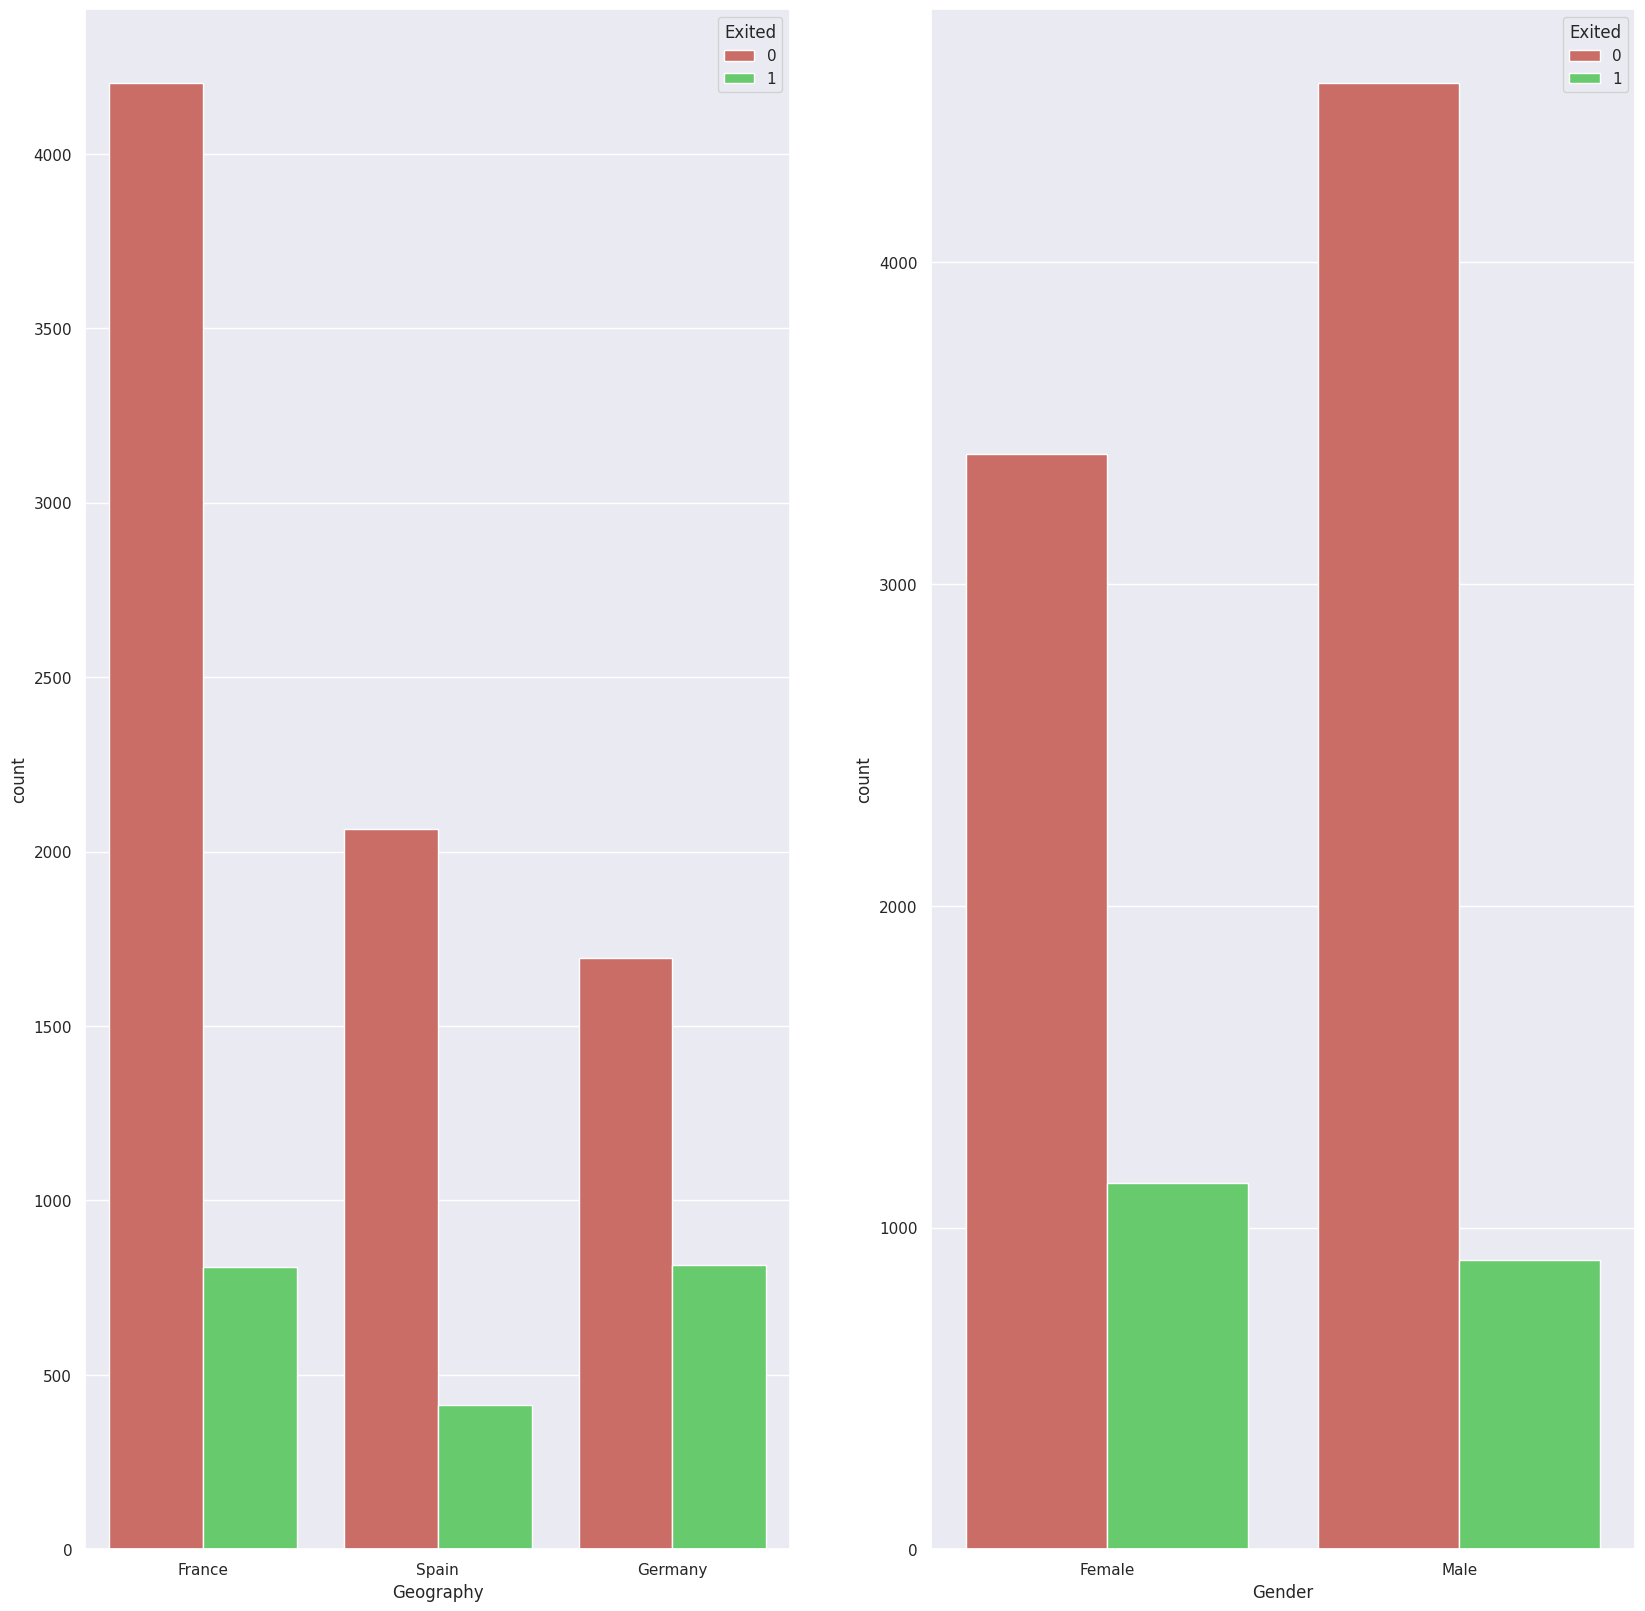

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax = [ax1, ax2]

for coluna in range(len(categoricas)):
    sns.countplot(x = categoricas[coluna],
                  hue = "Exited",
                  data = df,
                  ax = ax[coluna])

Na distribuição da variável `Exited` em relação à variável `Geography`, gráfico da esquerda, podemos notar que a França apresenta a maior quantidade de clientes, com a maioria permanecendo no banco. O número de clientes que saíram, em relação ao total desse país, é relativamente baixo.

Alemanha apresenta um alto índice de churn em relação ao seu total de clientes. A proporção de clientes que saíram é significativamente maior do que nos outros países. Sendo assim, clientes da Alemanha estão mais propensos a cancelar seus serviços com o banco. Esse padrão sugere que localização geográfica pode ser um fator relevante para prever churn. 

No gráfico a diretoa, o número de clientes masculinos é um pouci maior do que o de clientes femininos. Mulheres apresentam uma taxa de churn mais alta em comparação aos homens, o que indica que o gênero parece influenciar a probabilidade de churn, com as mulheres apresentando maior tendência de evasão. Isso pode indicar a necessidade de estratégias de retenção mais eficazes para o público feminino.

Essas são as variáveis categóricas com tipo de dado numéricos, ou seja, já houve uma codificação da classe que a informação representa.

In [32]:
selected_columns = df_graph[['NumOfProducts', 'HasCrCard', 'IsActiveMember']]

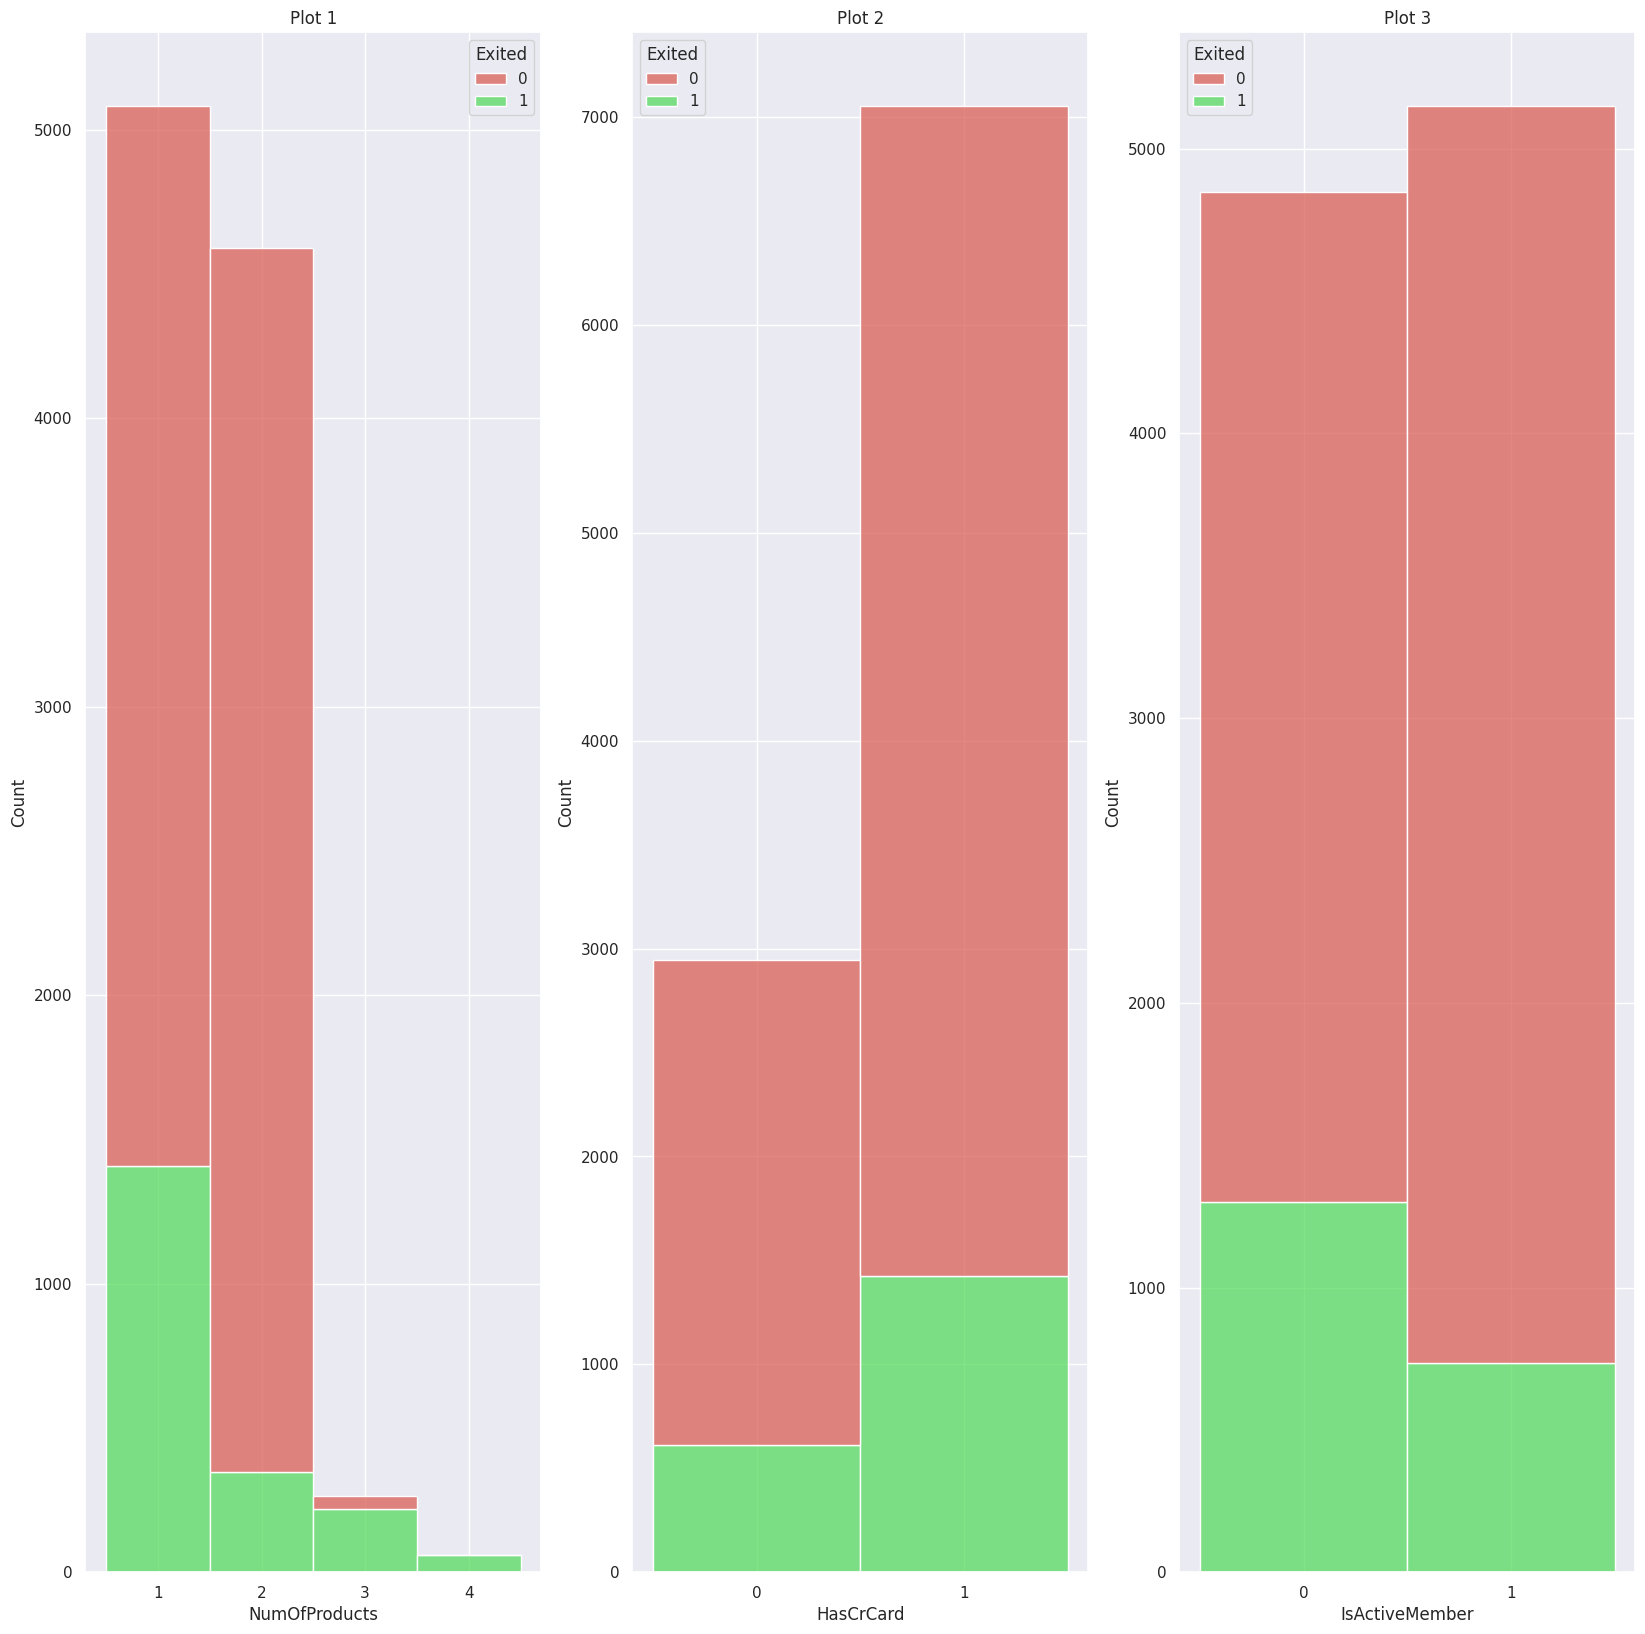

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
ax = [ax1, ax2, ax3]

for coluna in range(len(selected_columns.columns)):
    unique_values = df[selected_columns.columns[coluna]].unique()

    sns.histplot(x=selected_columns[selected_columns.columns[coluna]],
                  hue="Exited",
                  data=df,
                  ax=ax[coluna],
                  multiple="stack",
                  discrete=True,
                  bins=unique_values)

    ax[coluna].set_xticks(unique_values)
    ax[coluna].set_title(f'Plot {coluna + 1}')  # Adiciona o título numerado

plt.show()

In [34]:
# df_graph[['NumOfProducts', 'Exited']].value_counts()
# df_graph['NumOfProducts'].value_counts()

1. Número de produtos bancários `NumOfProducts` – Gráfico da esquerda

A maior parte dos clientes possui 1 ou 2 produtos bancários. Ainda nota-se que clientes com apenas 1 produto apresentam uma alta taxa de churn, com uma proporção significativa de todos os clientes que saíram.
Para 3 produtos, o número de clientes que saíram aumenta drasticamente, representa 80% de churn. E quando a quantidade de produto é 4 o churn vai para 100%. Mostra que é de extrema importância entender quais são esses produtos e ainda indica oportunidades de melhoria da experiência do cliente, nesse ponto usando um cross-selling¹ bem feito oferece-se aos clientes soluções que realmente agregam valor, tornando sua experiência mais completa e satisfatória.


¹ Cross-selling, ou venda cruzada, é uma estratégia de vendas que consiste em oferecer produtos ou serviços complementares àquilo que o cliente já está comprando ou demonstrou interesse em adquirir. 

2. Cartão de crédito `HasCrCard` - Gráfico do meio

A maioria dos clientes possui cartão de crédito (HasCrCard = 1). No entanto, a taxa de churn parece ser similar entre clientes que possuem e os que não possuem cartão de crédito. Pode indicar que ter um cartão de crédito não é um fator decisivo para a permanência ou saída do cliente. Isso indica que outros produtos ou serviços podem ter mais influência na decisão de churn.

3. Atividade do Cliente `IsActiveMember` – Gráfico da direita

Para clientes ativos `IsActiveMember` = 1 a taxa de churn é mais baixa do que clientes inativos (`IsActiveMember` = 0).
Há uma concentração maior de churn entre os clientes inativos. Podemos dizer que o nível de engajamento com o banco é um fator importante para a retenção de clientes. Clientes inativos têm maior propensão a sair, sugerindo que incentivar a participação ativa pode ser uma estratégia eficaz para reduzir o churn.

#### **3.1.4 Preditores Numéricos**

As **variáveis numéricas** desempenham um papel crucial na construção de modelos preditivos, pois capturam informações quantitativas que podem influenciar diretamente a probabilidade de churn. Para compreender melhor o comportamento dessas variáveis e identificar padrões relevantes, realizaremos uma análise exploratória detalhada por meio de:

- **(a) Análises Visuais**: Utilizaremos gráficos (como histogramas, boxplots e gráficos de densidade) para visualizar a distribuição das variáveis numéricas e identificar possíveis **outliers**, **tendências** e **assimetrias**.  
- **(b) Análises Tabulares**: Examinaremos estatísticas descritivas (média, mediana, desvio padrão, valores máximos e mínimos) para entender a dispersão e o comportamento geral dos dados.

As principais variáveis numéricas do nosso conjunto de dados são:  
- **`CreditScore`**: Pontuação de crédito do cliente.  
- **`Age`**: Idade do cliente.  
- **`Tenure`**: Tempo de relacionamento com o banco (em anos).  
- **`Balance`**: Saldo disponível na conta do cliente.  
- **`EstimatedSalary`**: Salário estimado do cliente.  

Essa abordagem permitirá identificar padrões de comportamento relevantes, além de possíveis **outliers** ou **valores extremos**, que poderão impactar o desempenho do modelo preditivo.

In [35]:
df_graph.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [36]:
numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df_graph[numericas]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10
...,...,...,...,...,...
9995,771,39,5,0.00,96270.64
9996,516,35,10,57369.61,101699.77
9997,709,36,7,0.00,42085.58
9998,772,42,3,75075.31,92888.52


#####  3.1.4.1 Plots dos Preditores Numéricos

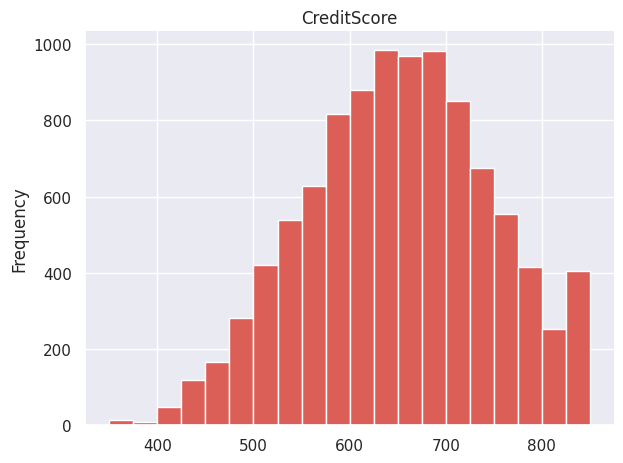

In [37]:
df_graph['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.tight_layout()

In [38]:
df_graph['CreditScore'].mean()

650.5288

O histograma do `CreditScore` apresenta uma distribuição em que concentra-se a maioria dos clientes com pontuações entre 600 e 700. Há poucos clientes com pontuações muito baixas (próximas de 400) ou muito altas (acima de 800), indicando que extremos de crédito são menos comuns.

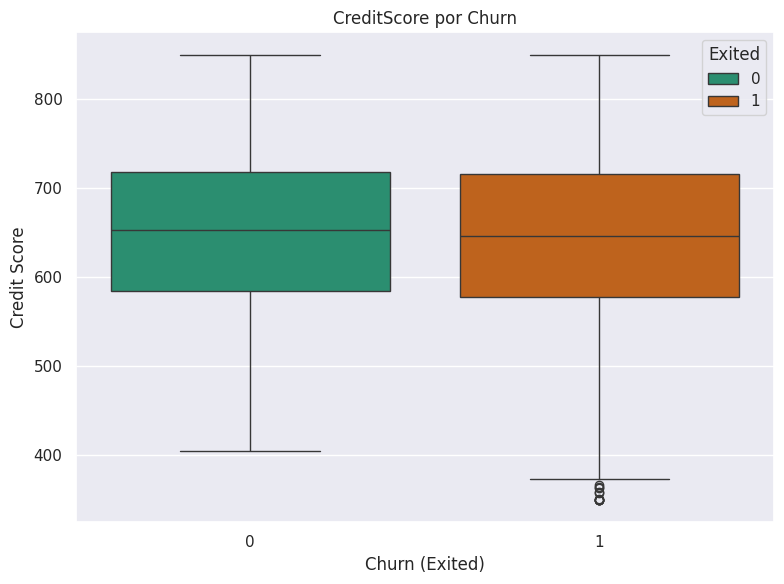

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df_graph, hue='Exited', palette='Dark2')

plt.title('CreditScore por Churn')
plt.xlabel('Churn (Exited)')
_ = plt.ylabel('Credit Score')

plt.tight_layout()

O `CreditScore` não apresenta diferenças substanciais entre os clientes que ficaram e os que saíram, sugerindo que outros fatores podem ter sido mais relevantes para o churn, como engajamento, número de produtos contratados ou satisfação com os serviços.

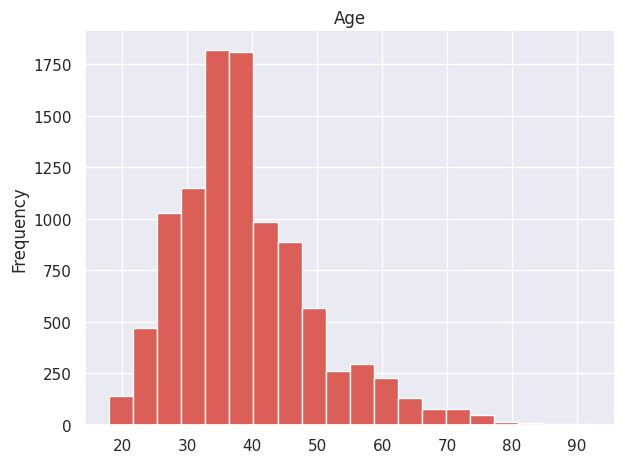

In [40]:
df_graph['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.tight_layout()

A variável `Age` apresenta uma distribuição assimétrica à direita, positivamente enviesada, ou seja, a maioria dos dados se concentra no lado esquerdo do gráfico, com uma "cauda" longa se estendendo para a direita.

Observa-se que a maioria dos clientes tem idade concentrada entre 30 e 40 anos, com a frequência máxima nessa faixa. A partir dos 40 anos, a quantidade de clientes diminui gradualmente, sendo muito baixa para clientes com mais de 60 anos.

Sendo assim, podemos dizer que a maioria dos clientes são compostas por jovens adultos. Se for estratégia da empresa de ampliar a base de clientes acima dos 40 deverá realizar estratégias para esse nicho.

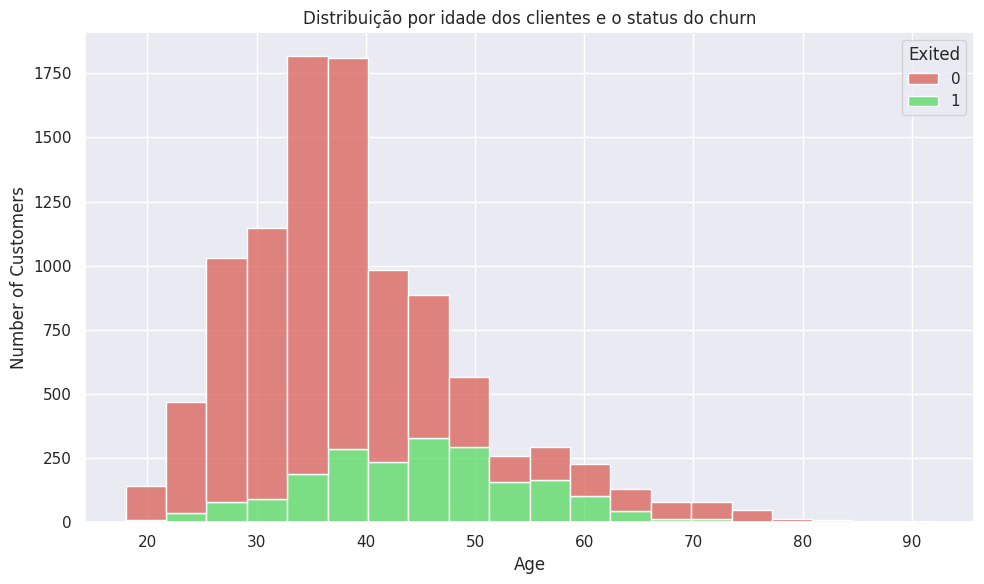

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=20)
plt.title('Distribuição por idade dos clientes e o status do churn')
plt.xlabel('Age')
_ = plt.ylabel('Number of Customers')

plt.tight_layout()

A partir dos 40 anos, observa-se um aumento significativo na taxa de churn. Embora o número total de clientes diminua com o avanço da idade, a proporção de clientes que saem cresce de forma notável.

Entre os clientes com idade entre 40 e 60 anos, a quantidade de churn (em verde) é expressiva, indicando que esse grupo está mais propenso a deixar o banco. Para clientes com mais de 60 anos, apesar do volume menor, a proporção de churn continua elevada.

Mostra que se a estratégia for aumentar a base com clientes acima de 40, além de atrair esse nicho a instituição terá que fazer uma estratégia de retenção nesse nicho de idade.

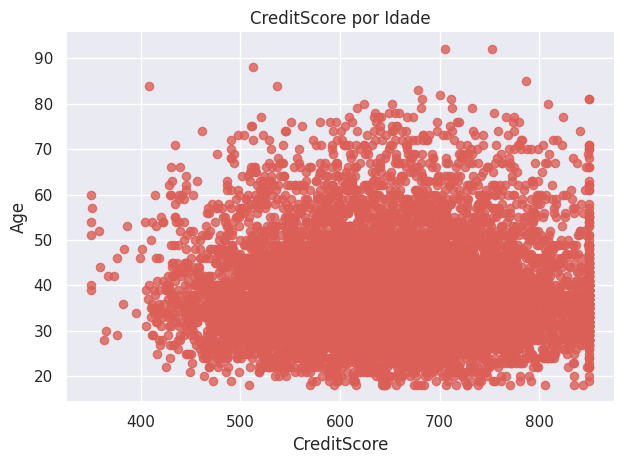

In [42]:
df_graph.plot(kind='scatter', x='CreditScore', y='Age', s=35, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.title('CreditScore por Idade')
plt.tight_layout()

O gráfico de dispersão (scatter plot) apresentado mostra a relação entre o `CreditScore` e a idade `Age` dos clientes. A idade não parece ser um fator determinante para a pontuação de crédito nesta base de dados, pois não há uma relação clara ou tendência evidente na relação dessas *features* . Isso sugere que a avaliação de crédito pode depender mais de outros fatores.

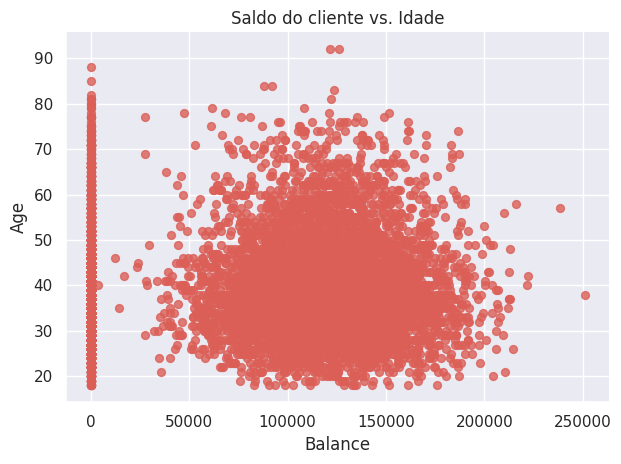

In [43]:
df_graph.plot(kind='scatter', x='Balance', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.title('Saldo do cliente vs. Idade')
plt.tight_layout()

Não há indícios de que o saldo da conta bancária esteja diretamente relacionado à idade do cliente. A elevada concentração de clientes com saldo zero merece uma investigação mais detalhada, pois pode impactar a análise de churn. Clientes de todas as faixas etárias possuem uma ampla variação de saldo. A maior parte dos clientes tem saldo concentrado entre 50.000 e 150.000 unidades monetárias, espalhados por diversas faixas etárias.

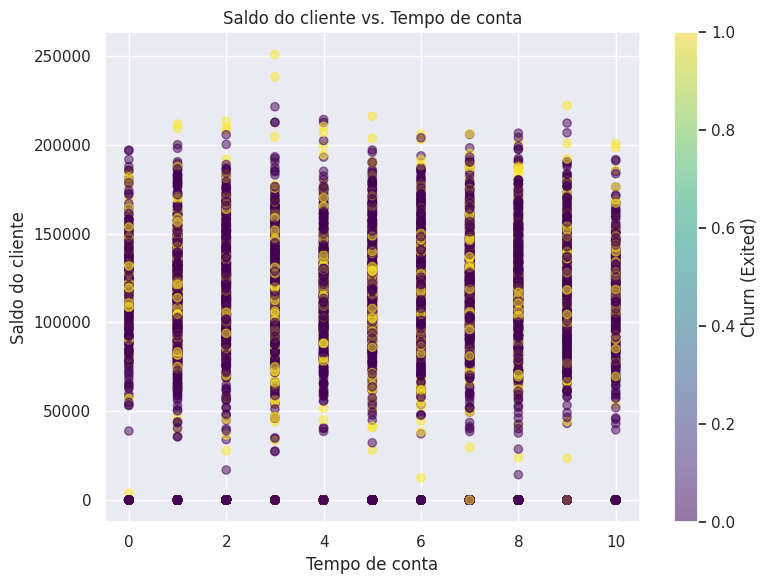

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(df_graph['Tenure'], df_graph['Balance'], c=df_graph['Exited'], cmap='viridis', alpha=0.5)

plt.title('Saldo do cliente vs. Tempo de conta')
plt.xlabel('Tempo de conta')
plt.ylabel('Saldo do cliente')
_ = plt.colorbar(label='Churn (Exited)')

plt.tight_layout()

Esse plot que relaciona o saldo do cliente `Balance` com o tempo de conta, em anos, `Tenure`, sendo ponto roxo uma cliente que não evadiu e um ponto amarelo um cliente que evadiu, podemos notar que o saldo elevado parece estar associado a uma maior taxa de churn, o que pode indicar a necessidade de melhorar a oferta de produtos ou serviços para esse perfil de cliente.

O tempo de conta não apresenta uma relação clara com o churn, pois todos os tempos de conta apresenta evasão de clientes, o que sugere ações de retenção não devem ser baseadas apenas na longevidade do cliente.

A presença de clientes com saldo zero em todo os tempos de conta, pode ser um indicativo de contas inativas ou de baixo engajamento, o que também merece investigação e estratégias específicas.

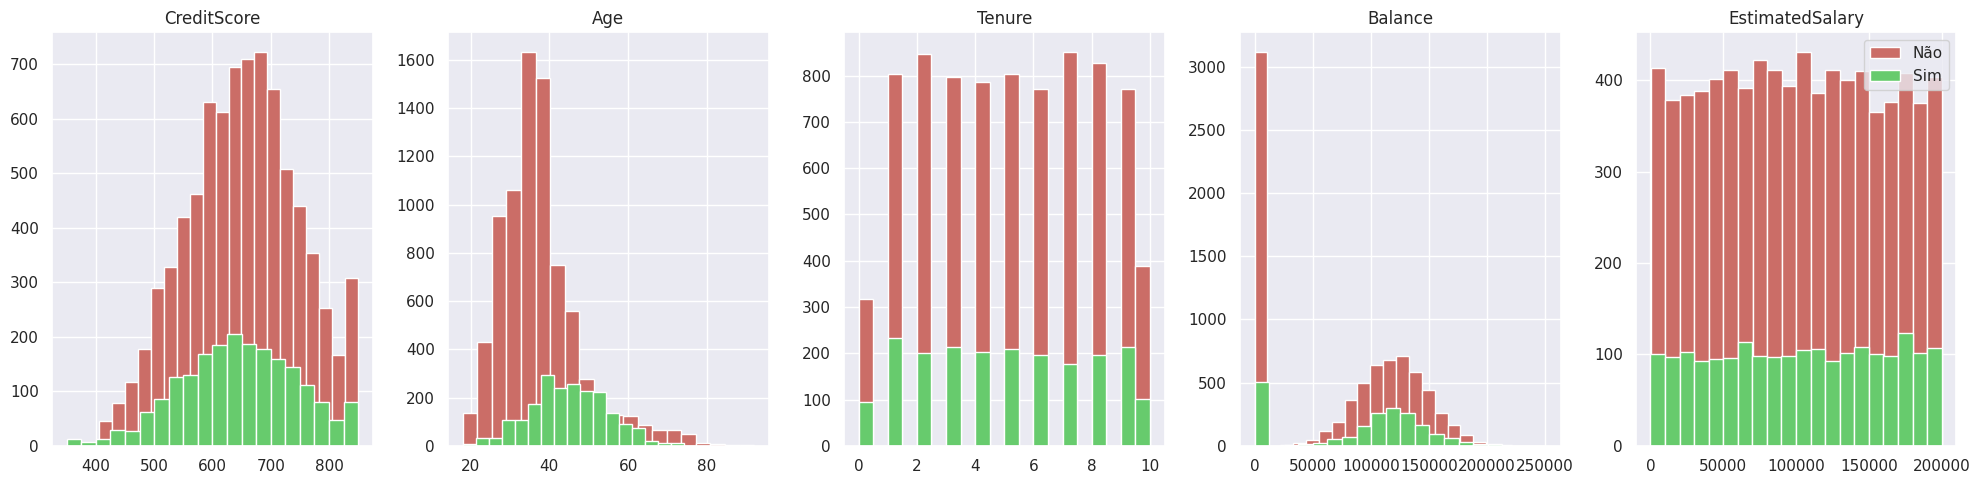

In [45]:
fig, ax =  plt.subplots(1, 5, figsize=(20,5))

df[df.Exited == 0][numericas].hist(bins= 20, color= "#CB6D67", ax= ax, label= "Não")
df[df.Exited == 1][numericas].hist(bins= 20, color= "#67CB6D", ax= ax, label = "Sim")

plt.legend()
plt.tight_layout()

##### **Análise Geral dos Preditores Numéricos**

Os histogramas acima apresentam a distribuição das variáveis numéricas segmentadas pelo status de **churn** (`Exited`), onde **vermelho** representa clientes que **permaneceram** e **verde** representa clientes que **saíram**.

**Principais Observações:** orienta estratégias futuras e estudos mais aprofundados.

- **`CreditScore`**: Distribuição semelhante entre clientes que saíram e permaneceram, indicando que a pontuação de crédito não é um fator determinante isolado para o churn.  
- **`Age`**: Clientes **mais velhos** apresentam uma **maior propensão ao churn**, com a evasão aumentando significativamente após os **40 anos**.  
- **`Tenure`**: O **tempo de conta** não demonstra relação clara com o churn, sugerindo que o tempo de relacionamento com o banco não influencia diretamente a saída.  
- **`Balance`**: Clientes com **saldos mais elevados** parecem ter maior tendência a deixar o banco, destacando a necessidade de estratégias de retenção para esse grupo.  
- **`EstimatedSalary`**: A distribuição do salário estimado é **uniforme** entre clientes que saíram e os que permaneceram, indicando que essa variável tem pouco impacto no churn.


#####  3.1.4.2 Tabulação dos Preditores Numéricos

Tabulando as variáveis numéricas podemos responder agumas perguntas

In [46]:
numericas

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

**1.** Qual o salário médio anual `EstimatedSalary` e o saldo médio da conta `Balance` de pessoas que deixaram o banco (**1**) e dos que continuam clientes (**0**)?

In [47]:
df.groupby(['Exited'])[['EstimatedSalary', 'Balance']].agg([np.mean])

,EstimatedSalary,Balance
,mean,mean
Exited,,
0,99738.391772,72745.296779
1,101465.677531,91108.539337


**2.** Qual a quantidade média de anos que um cliente mantém uma conta nesta instituição? Considerando os que deixaram o banco (**1**) e dos que continuam clientes (**0**).

In [48]:
df.groupby(['Exited'])['Tenure'].agg([np.mean])

,mean
Exited,
0,5.033279
1,4.932744


**3.** Qual o perfil de idade dos clientes que estão na instituição?

In [49]:
df['Age'].loc[df['Exited'] == 0].describe()

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

In [50]:
df['Age'].loc[df['Exited'] == 0].quantile([0.25, 0.5, 0.85, 0.95, 0.98])

0.25    31.0
0.50    36.0
0.85    45.0
0.95    59.0
0.98    68.0
Name: Age, dtype: float64

Do total da base, cerca de 7,9 mil clientes estão na Instituição Financeira. A idade mínima dessa base de dados desses clientes é de 18 anos. Metade dessa base tem até 36 anos. O cliente mais velho possui 92 anos. Dado a média e a dispersão da idade, sugere que clientes acima de 60 anos a quantidade não tem muita representatividade, sendo assim, podemos dizer que 85% desses clientes possui idade até 45 anos.

##### **3.1.4.3 Distribuição dos Dados – Assimetria (*Skewness*) e Curtose (*Kurtosis*)**

Nesta etapa, será analisada a **distribuição dos dados** de cada variável, com foco em duas medidas estatísticas importantes: **assimetria** (*skewness*) e **curtose** (*kurtosis*).

- **Assimetria (*Skewness*)**: Indica o grau de **simetria** da distribuição dos dados em relação à média.  
  - Uma distribuição **simétrica** tem skew próximo de **0**.  
  - Assimetria **positiva** (skew > 0) indica concentração de valores à **esquerda**, com cauda alongada à **direita**.  
  - Assimetria **negativa** (skew < 0) indica concentração à **direita**, com cauda alongada à **esquerda**.

- **Curtose (*Kurtosis*)**: Mede o grau de **achatamento** ou **picos** da distribuição em comparação com a distribuição normal.  
  - Curtose **próxima de 0** indica uma distribuição semelhante à **normal**.  
  - Curtose **positiva** indica uma distribuição com **picos acentuados** e caudas mais longas (**leptocúrtica**).  
  - Curtose **negativa** indica uma distribuição mais **achatada** (**platicúrtica**).

Muitos algoritmos de **Machine Learning** pressupõem que as variáveis possuem uma **distribuição normal (gaussiana)**. Avaliar a **assimetria** e a **curtose** permite aplicar técnicas de **pré-processamento** adequadas (como transformação logarítmica, normalização ou padronização) para ajustar a distribuição dos dados. Esse ajuste pode melhorar significativamente a **performance** e a **acurácia** do modelo preditivo.

In [51]:
df[numericas].skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

`CreditScore`      -> Pequena assimetria negativa, sugerindo uma leve concentração de valores mais altos, com poucos valores mais baixos.

`Age` -> Assimetria positiva moderada, indicando uma cauda alongada à direita. Poderá ter que realizar transformação nessa variável.

`Tenure` -> Assimetria praticamente zero, indicando uma distribuição simétrica.

`Balance` -> Assimetria levemente negativa, sugerindo uma distribuição quase simétrica, mas com uma leve cauda à esquerda.

`EstimatedSalary` -> Assimetria próxima de zero, indicando uma distribuição altamente simétrica.

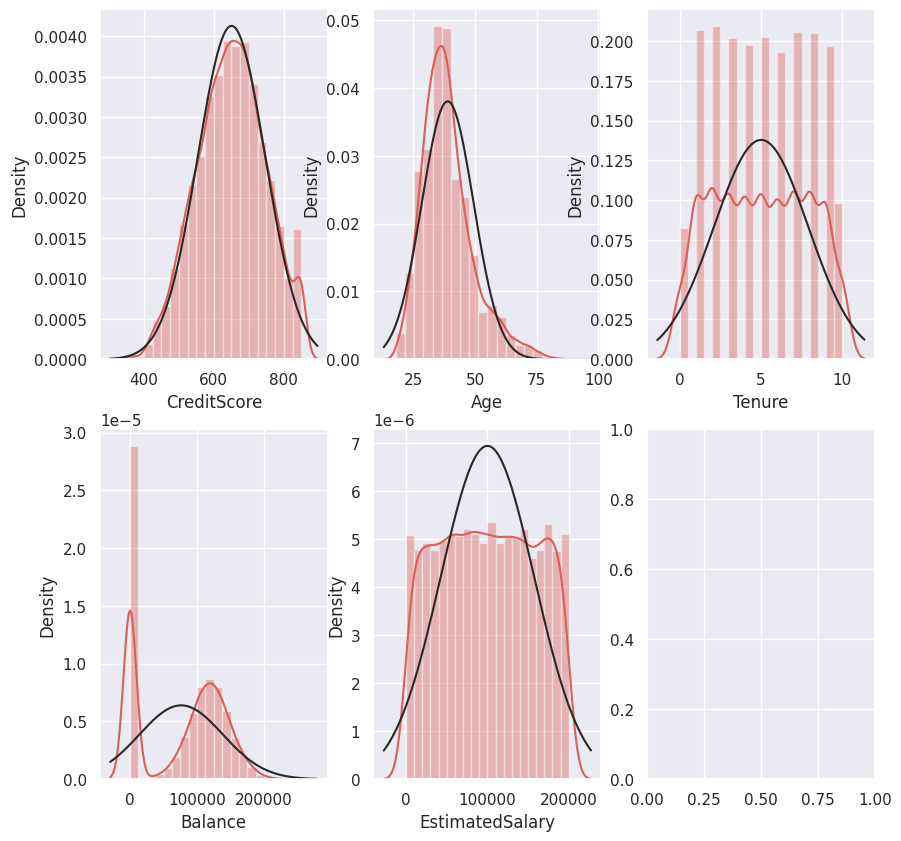

In [52]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10,10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6]

for coluna in range(len(numericas)):
  sns.distplot(df[numericas[coluna]], bins=20, hist=True, ax=ax[coluna],fit = stats.norm)

##### **3.1.4.4 Identificação de *Outliers***

A análise de **outliers** é uma etapa essencial no processo de pré-processamento de dados, pois valores extremos podem distorcer estatísticas descritivas e impactar negativamente o desempenho dos modelos de **Machine Learning**.

Para identificar esses pontos fora do padrão, utilizaremos **boxplots**, que oferecem uma representação visual da **distribuição** de cada variável. A interpretação do boxplot inclui:

- A **linha central** da caixa representa a **mediana** (50º percentil).  
- A borda inferior da caixa indica o **primeiro quartil (Q1 - 25%)**.  
- A borda superior da caixa indica o **terceiro quartil (Q3 - 75%)**.  
- As **extensões** se estendem até o menor e maior valor dentro de **1,5 vezes o intervalo interquartílico (IQR)**.  
- **Pontos fora dos bigodes** são considerados **outliers**.

Identificar outliers permite compreender melhor a **dispersão dos dados** e avaliar a necessidade de **tratamento adequado**, como remoção ou transformação desses valores. Essa análise contribui para melhorar a **qualidade dos dados** e aumentar a **robustez** do modelo preditivo.


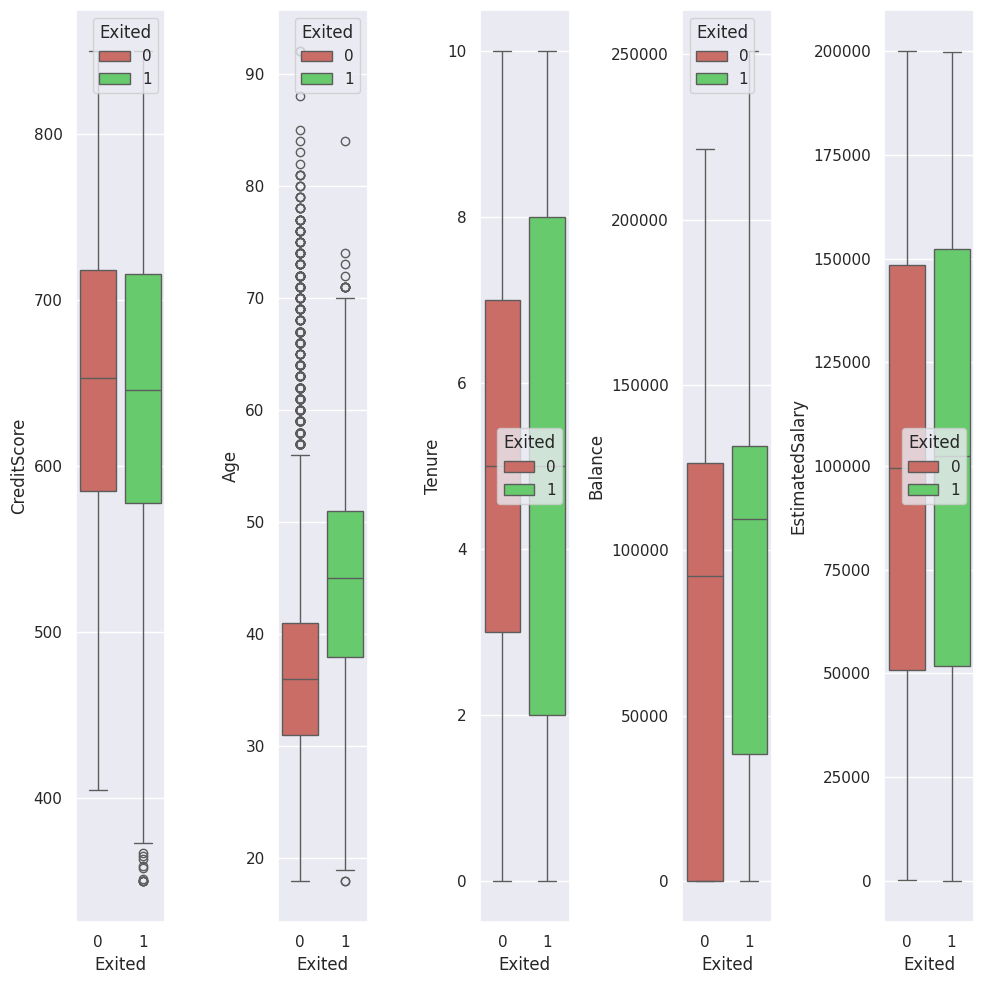

In [53]:
fig, ax = plt.subplots(1, 5, figsize=(10,10))


for coluna in range(len(numericas)):
    sns.boxplot(x = 'Exited', y = numericas[coluna], data=df, ax=ax[coluna], hue='Exited')

plt.tight_layout() 
plt.show()

Considerando a definição clássica de **outliers** — valores que excedem **1,5 vezes o intervalo interquartílico (IQR)** —, identificamos que as variáveis **`CreditScore`** e **`Age`** apresentam pontos que são classificados como outliers. No entanto, é importante ressaltar que **não existe uma regra fixa** para o tratamento desses valores, sendo essencial compreender o **contexto dos dados** antes de decidir por sua remoção ou ajuste.

No caso da variável **`Age`**, os valores identificados como outliers representam clientes com **idades mais elevadas**, sendo que o cliente mais velho possui **92 anos**. Esse é um valor **real e legítimo**, que reflete a diversidade etária dos clientes. Remover esse dado poderia resultar na **perda de informações relevantes**.

De maneira similar, para a variável **`CreditScore`**, os valores extremos correspondem a **pontuações de crédito efetivas** atribuídas aos clientes. Essas pontuações fazem parte da **realidade financeira** de cada indivíduo e excluí-las poderia comprometer a **integridade dos dados**.

Dado que os outliers identificados refletem condições **naturais** e **válidas** dos clientes, optamos por **não realizar ajustes** ou exclusões com base nesses valores. A manutenção desses dados assegura que o modelo seja treinado com a **diversidade real** da base de clientes.


Nesta fase de exploração dos dados vemos que:


1.   Não houve ados faltantes.
2.   Existe uma predominância nos dados de *feature* categórica, que enseja no uso de técnicas de *dummie's*.
1.   Algumas features não tem poder preditivo.
2.   Ficou claro que um dos pressupostos da classificação não foi atendido, há um desbalaceamento de classes das variável a ser predita.
2.   Poderíamos ter feito (a) correlações, (b) re-shape dos dados, (c) alterado variáveis categóricas para apenas binária... enfim, é muito vasto a fase de exploração. Para nosso propósito acredito já ser suficiente.

Iniciaremos a fase de preparar os dados para apresentá-los ao modelo preditivo.





## **4. Pré-Processamento dos Dados**

### **Preparando os Dados para Machine Learning**

O **pré-processamento dos dados** é uma etapa fundamental no desenvolvimento de modelos de **Machine Learning**, pois muitos algoritmos exigem que os dados estejam em formatos específicos e adequadamente preparados para garantir um desempenho eficiente. Essa preparação inclui desde o **tratamento de dados ausentes**, **normalização** e **padronização** até a **codificação de variáveis categóricas** e **remoção de outliers**.

**Importância do Pré-Processamento:**  
- **Melhora a performance** e a **eficiência** dos algoritmos.  
- Garante que os dados estejam em um formato **compatível** com o modelo.  
- **Reduz ruídos** e **viéses**, aumentando a **precisão** das previsões.  

Explorar diferentes técnicas de preparação de dados e avaliar seu impacto no desempenho dos modelos faz parte do processo iterativo da **Ciência de Dados**. Essa experimentação é essencial para desenvolver soluções robustas e eficazes.

**Testar diferentes abordagens é uma das partes mais interessantes e criativas da Ciência de Dados!**


### 4.1 Transformação de Variáveis/Atributos

In [54]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 4.1.1 Excluindo atributos sem relevancia

Variáveis que não contribuem para a previsão, como **`CustomerId`**, **`RowNumber`** e **`Surname`**, serão excluídas por não apresentarem valor preditivo.

Boa prática é sempre manter intacto o dataSet original e realizar uma cópia para realizar os pré-processamento.

In [55]:
df_proc = df.copy()
df_proc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df_proc.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1, inplace= True)
df_proc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 4.2 Feature Engineer - I


#### **4.2.1 Imputação de Valores Ausentes**

Embora o conjunto de dados atual **não apresente valores ausentes**, é importante documentar estratégias de **imputação** para lidar com situações futuras em que **dados faltantes** possam surgir durante o processo de **pré-processamento** ou em atualizações da base de dados.

A imputação de valores ausentes deve ser realizada com cuidado, considerando o tipo de variável (numérica ou categórica) e a distribuição dos dados. Abaixo estão dois métodos amplamente utilizados para **variáveis numéricas**:

**Imputação pela Mediana**  
A substituição de valores ausentes pela **mediana** é recomendada quando a variável possui **outliers**, pois a mediana é menos sensível a valores extremos do que a média.

**Implementação com `SimpleImputer`:**

```python
from sklearn.impute import SimpleImputer
import numpy as np

# Criando o imputador com estratégia de mediana
imp_num = SimpleImputer(missing_values=np.nan, strategy='median', add_indicator=True)

# Aplicando a imputação nos dados
dados_imputados = imp_num.fit_transform(dados)


In [57]:
df_proc.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### 4.2.2 Codificação de Variáveis Categóricas (*Dummies*)

Algoritmos de **Machine Learning** geralmente requerem que todas as variáveis estejam em **formato numérico**. Por isso, é necessário transformar as variáveis **categóricas** em representações numéricas sem perder a **informação semântica**. Esse processo é conhecido como **codificação de variáveis categóricas**.

A escolha da técnica de codificação depende do tipo de variável categórica: **binária** ou **multiclasse**.

**Para Variáveis Categóricas Binárias:**  
Quando a variável apresenta **duas categorias** (ex.: **`Gender`** com valores *Masculino* e *Feminino*), a codificação **ordinal** é mais apropriada.

**método utilizado: `LabelEncoder`**  
Atribui **valores inteiros sequenciais** para representar as categorias.


Iremos aplicar a forma 1

In [58]:
label_encoder = LabelEncoder()

In [59]:
# variáveis categóricas
df_proc['Geography'] = label_encoder.fit_transform(df_proc['Geography'])
df_proc['Gender'] = label_encoder.fit_transform(df_proc['Gender'])

print(df_proc[['Geography', 'Gender']].head())

   Geography  Gender
0          0       0
1          2       0
2          0       0
3          0       0
4          2       0


**`Geography`** – Codificação dos países:

| País      | Codificação |
|-----------|-------------|
| França    | 0           |
| Alemanha  | 1           |
| Espanha   | 2           |

**`Gender`** – Codificação de gênero:

| Gênero    | Codificação |
|-----------|-------------|
| Feminino  | 0           |
| Masculino | 1           |


#### 4.2.3 Discretização de Variáveis Numéricas

A **discretização** consiste em transformar variáveis **numéricas contínuas** em **categorias discretas** com base em faixas de valores previamente definidas. Essa técnica pode ser útil para identificar **padrões ocultos** e melhorar a performance de alguns algoritmos de **Machine Learning**, especialmente aqueles que se beneficiam de variáveis categóricas.

Um exemplo claro é a variável **`Age`** (idade), que pode ser discretizada em **faixas etárias** para facilitar a análise e verificar se essa nova segmentação contribui para a melhoria do modelo preditivo.

In [60]:
df_proc['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Usamos os quartis fornecidos para criar categorias:

Faixas sugeridas:
18 a 32 (primeiro quartil, jovens)
33 a 37 (segundo quartil, jovens-adultos)
38 a 44 (terceiro quartil, adultos)
45 ou mais (acima do terceiro quartil, experientes)
Essa abordagem é boa para manter uma divisão equilibrada entre categorias.

* 'Jovens':1
* 'Jovens-Adultos':2
* 'Adultos':3
* 'Experientes':4

In [61]:
bins = [18, 32, 37, 44, 92]
labels = [1, 2, 3, 4]

df_proc['AgeGroup'] = pd.cut(df_proc['Age'], bins=bins, labels=labels, include_lowest=True)
print(df_proc[['Age', 'AgeGroup']].tail())
print(df_proc['AgeGroup'].value_counts())


      Age AgeGroup
9995   39        3
9996   35        2
9997   36        2
9998   42        3
9999   28        1
AgeGroup
1    2790
3    2573
4    2340
2    2297
Name: count, dtype: int64


In [62]:
df_proc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,3
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,3
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,3


### 4.3 Split dados

Para avaliar o desempenho do modelo, é fundamental dividir os dados em conjuntos de treino e teste. Duas abordagens amplamente utilizadas são: 
* (i) o método estático, implementado pela função train_test_split da biblioteca sklearn.model_selection, que separa os dados em uma única iteração; e
* (ii) a validação cruzada (Cross-validation), que realiza divisões aleatórias e avalia o modelo em diferentes subconjuntos para maior robustez.

Optamos pelo método estático, configurando 75% dos dados para treino e 25% para teste, garantindo simplicidade e uma divisão consistente para o desenvolvimento inicial do modelo.



#### 4.3.1 Estático

In [63]:
df_proc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,3
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,3
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,3


> **Nota Importante:** Inicialmente, consideramos que a discretização da variável **`Age`** poderia contribuir positivamente para o desempenho do modelo. No entanto, durante o processo de **balanceamento de classes** por meio de **oversampling**, observamos a geração de um grande número de **valores ausentes (missing)** nessa variável discretizada.  
>
> Como o modelo balanceado com **oversampling** foi o que apresentou a **melhor acurácia**, optamos por **remover** a variável discretizada de **`Age`** do treinamento para evitar impactos negativos no desempenho.  
>
> Ainda assim, mantemos o registro do processo de discretização para **demonstrar a importância das transformações de variáveis** e como essas manipulações podem influenciar significativamente a **performance dos modelos preditivos**.


In [76]:
X = df_proc.drop(columns= ['Exited', 'AgeGroup'], axis= 1)
y = df_proc.Exited

O parâmetro **`stratify=True`** assegura que a divisão dos dados em **conjuntos de treino e teste** mantenha a **proporção original das classes** da variável alvo, evitando desequilíbrios entre as categorias.  

Já o parâmetro **`shuffle=True`** tem a função de **embaralhar aleatoriamente** os dados antes da divisão, garantindo que a separação entre treino e teste ocorra de forma **aleatória**, reduzindo o risco de viés nos conjuntos.

In [77]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, shuffle=True)

In [78]:
print('tamanho total dos dados são {}, para treino temos {} e teste são {}'.format(df_proc.shape[0], len(X_treino), len(X_teste)))

tamanho total dos dados são 10000, para treino temos 7500 e teste são 2500


### 4.4 Feature Engineer - II

#### 4.4.1.Balanceamento de classes

São técnicas para manter um "certo balancemanto" entre as classes, pois se temos classe majoritária o modelo de *ML*, possivelmente aprenderá mais sobre ela, logo temos um problema -> **modelo sem generalização**, devemos evitar!!.

Podemos utilizar:

- **Oversampling (Superamostragem)**: Aumentar a quantidade de registros da classe minoritária por meio da duplicação de dados ou geração de novas amostras sintéticas, como a técnica **SMOTE** (*Synthetic Minority Over-sampling Technique*).  
- **Undersampling (Subamostragem)**: Reduzir a quantidade de registros da classe majoritária, eliminando amostras redundantes para equilibrar a proporção entre as classes.  

**ATENÇÃO 1**: o ideal é sempre aplicar as técnicas depois de realizar o split dos dados (treino e teste). Se aplicar o balancemento antes, o padrão usado para aplicar o oversampling/undersampling será o mesmo nos dados de treino e de teste, com isso a avaliação do modelo fica comprometida.

**ATENÇÃO 2**: você ao tomar decisão de balancear os dados, diretamente está alterando seu conjunto de dados. Ou seja, saiba **o que** está fazendo e **para que** está fazendo!!!!

##### 4.4.1.1 Usando *Undersampling*

In [67]:
# a. instanciar as classes dos métodos pretendidos
rus = RandomUnderSampler()

# b. usam método fit_sample() para usar a técnica
X_treino_rus, y_treino_rus = rus.fit_resample(X_treino, y_treino)

# Verificar a nova distribuição das classes
print("\Antes do balanceamento:", X_treino.shape[0])
print("\Depois de balancear:", X_treino_rus.shape[0])

\Antes do balanceamento: 7500
\Depois de balancear: 3056


Checando valores ausentes.

In [68]:
X_treino_rus.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

##### 4.4.1.2 Usando *Oversampling*

In [79]:
# a. instanciar as classes dos métodos pretendidos
smote = SMOTE(random_state=42)

# b. usam método fit_sample() para usar a técnica
X_resampled, y_resampled = smote.fit_resample(X_treino, y_treino)

# Verificar a nova distribuição das classes
print("Distribuição antes SMOTE:", Counter(y_treino))
print("Distribuição após SMOTE:", Counter(y_resampled))

Distribuição antes SMOTE: Counter({0: 5972, 1: 1528})
Distribuição após SMOTE: Counter({0: 5972, 1: 5972})


Checando valores ausentes.

In [80]:
X_resampled.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

= output: dados pré-processados e splitados para iniciar a construção do modelo de ML

### **4.5 Avaliação de Multicolinearidade**

A **multicolinearidade** ocorre quando variáveis independentes estão altamente correlacionadas, o que pode distorcer os **coeficientes** do modelo, dificultar a **interpretação** e reduzir a **precisão preditiva**.  

Para detectar esse problema, utiliza-se o **Fator de Inflação da Variância (VIF)**, que indica o quanto a variância de um coeficiente é ampliada pela correlação entre variáveis.  

**Interpretação do VIF:**  
- **VIF ≈ 1:** Baixa correlação (**sem multicolinearidade**).  
- **VIF > 10:** Indica **multicolinearidade severa**.

**Tratamento da Multicolinearidade:**  
- **Ajustar ou remover** variáveis com **VIF elevado** para melhorar a **robustez** e a **interpretabilidade** do modelo.  
- Quando a remoção não for viável, aplicar **técnicas de regularização** como:  
  - **Ridge Regression (L2):** Penaliza coeficientes grandes, suavizando o impacto de variáveis correlacionadas.  
  - **Lasso Regression (L1):** Realiza **seleção de variáveis** ao reduzir coeficientes menos relevantes a zero.  

Essas técnicas ajudam a mitigar a multicolinearidade sem a necessidade de excluir variáveis importantes.

In [71]:
# X_resampled = X_resampled.replace([np.inf, -np.inf], np.nan)
# X_resampled = X_resampled.dropna()

vif_data = pd.DataFrame()
vif_data['Feature'] = X_resampled.columns
vif_data['VIF'] = [variance_inflation_factor(X_resampled.values, i) for i in range(X_resampled.shape[1])]

print("Valores de VIF para cada variável:")
print(vif_data)

Valores de VIF para cada variável:
           Feature        VIF
0      CreditScore  22.035977
1        Geography   1.810074
2           Gender   1.774821
3              Age  13.754587
4           Tenure   3.992206
5          Balance   2.874863
6    NumOfProducts   7.062512
7        HasCrCard   2.661923
8   IsActiveMember   1.668364
9  EstimatedSalary   3.900885


Pelas features que ficaram com valores acima de 10, sugere-no usar no precesso de regressão logística algurma técnica de regularização.

## **5. Seleção de Algoritmos**

### **5.1 Algoritmos de Classificação**

A escolha do algoritmo de **classificação** mais adequado não é previsível, pois diferentes modelos podem apresentar desempenhos distintos dependendo das características dos dados. Por esse motivo, é essencial **ajustar** (*fit*) e **avaliar** diversos algoritmos de classificação no conjunto de dados. O objetivo é identificar o modelo que oferece o melhor **desempenho preditivo** e **generalização**.

**Estratégia:**  
- Testaremos 3 formas dos dados (desbalanceados e balanceados com 2 técnicas)  em um  **algoritmo de classificação** Regressão Logística, considerando a natureza do problema que quermos resolver.
- Utilizaremos **métricas de avaliação** apropriadas (ex.: **Acurácia**, **Precisão**, **Recall**, **F1-Score**, **AUC-ROC**) para determinar o melhor tratamento dos dados e seguir com ele para o modelo.
- Faremos uso da Validação Cruzada.


**Validação Cruzada (Cross-Validation)**

Para evitar o **overfitting** (ajuste excessivo ao conjunto de treinamento) e garantir que o modelo tenha uma boa capacidade de **generalização**, aplicaremos a técnica de **Validação Cruzada (Cross-Validation)**.

**Como Funciona:**  
- O conjunto de dados é dividido em **k partes iguais** (*k-folds*), geralmente com **k = 5** (default da biblioteca usada) ou **k = 10**.  
- O modelo é treinado em **k-1 folds** e testado no fold restante.  
- Esse processo é repetido **k vezes**, alternando o fold de validação.  
- Ao final, a **média** e o **desvio padrão** das métricas de desempenho são calculados, proporcionando uma avaliação mais **estável** e **confiável**.

**Vantagens da Validação Cruzada:**  
- **Reduz a variância** dos resultados em comparação com uma simples divisão treino/teste.  
- **Maximiza o uso dos dados**, já que cada amostra participa do treinamento e da validação.  
- Proporciona uma **avaliação mais robusta** do modelo.

**Importante:**  
- A escolha adequada de **k** é fundamental. Valores muito baixos podem gerar avaliações instáveis, enquanto valores muito altos aumentam o **custo computacional**.  
- O valor de **k** deve ser definido considerando o tamanho do dataset e o tempo de processamento disponível.


In [72]:
# (a) instancia as classes dos algoritmos

algoritmos = [LogisticRegression()]

In [73]:
# (b) com dados desbalanceado
score_modelo = []
for classificador in algoritmos:
    score = cross_val_score(classificador,
                            X_treino,
                            y_treino,
                            scoring='recall')
    score_modelo.append(
        {'Estimator':classificador.__class__.__name__, 'Score médio':score.mean()}
        )
    print('Usando dados desbalanceados')
pd.DataFrame(score_modelo)

Usando dados desbalanceados


,Estimator,Score médio
0,LogisticRegression,0.071328


In [74]:
# (b) com dados balanceado com a técinca de UnderSampling
score_modelo = []
for classificador in algoritmos:
    score = cross_val_score(classificador,
                            X_treino_rus,
                            y_treino_rus,
                            scoring='recall')
    score_modelo.append(
        {'Estimator':classificador.__class__.__name__, 'Score médio':score.mean()}
        )
    print('Usando dados bancalanceados com a técnica de UnderSampling')
pd.DataFrame(score_modelo)

Usando dados bancalanceados com a técnica de UnderSampling


,Estimator,Score médio
0,LogisticRegression,0.668893


In [81]:
# (b) com dados balanceado com a técinca de OverSampling
score_modelo = []
for classificador in algoritmos:
    score = cross_val_score(classificador,
                            X_resampled,
                            y_resampled,
                            scoring='recall')
    score_modelo.append(
        {'Estimator':classificador.__class__.__name__, 'Score médio':score.mean()}
        )
    print('Usando dados bancalanceados com a técnica de OverSampling')
pd.DataFrame(score_modelo)

Usando dados bancalanceados com a técnica de OverSampling


,Estimator,Score médio
0,LogisticRegression,0.705276


Ao utilizar os dados balanceados por meio da técnica de **undersampling**, obtivemos o melhor desempenho em termos de **_Recall_**. Essa métrica é fundamental em problemas de **classificação desbalanceada**, pois avalia a capacidade do modelo em identificar corretamente as instâncias da **classe positiva**.

**Recall** = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)


**Interpretação:**  
- O **denominador** da fórmula considera tanto as previsões **corretas** (**Verdadeiros Positivos**) quanto as **falhas** na identificação da classe positiva (**Falsos Negativos**).  
- Um valor elevado de **Recall** indica que o modelo é eficaz em capturar a **maioria das instâncias positivas**, reduzindo o risco de deixar de identificar casos relevantes.

Dado o desempenho superior em **Recall**, optaremos por prosseguir com o modelo de **Regressão Logística com Regularização**, utilizando os dados balanceados por **undersampling**.

In [82]:
# Instanciar o modelo
ridge_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)

# Treinar o modelo
ridge_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [86]:
# Avaliar coeficientes após regularização
coef_df = pd.DataFrame({'Feature': X_resampled.columns, 'Coefficient': ridge_model.coef_[0]})
print(coef_df.sort_values(by='Coefficient', ascending=False))


           Feature   Coefficient
3              Age  8.412219e-02
5          Balance  4.278016e-06
9  EstimatedSalary -1.426315e-07
0      CreditScore -1.227092e-03
4           Tenure -5.924735e-02
1        Geography -1.263432e-01
7        HasCrCard -6.052691e-01
6    NumOfProducts -6.306722e-01
2           Gender -1.344342e+00
8   IsActiveMember -1.713152e+00


Os coeficientes de um modelo de Regressão Logística indicam o impacto de cada variável preditora sobre a probabilidade de ocorrência do evento da classe positiva (neste caso, o churn).

Interpretação Geral:

Coeficiente positivo → Aumenta a probabilidade de churn.
Coeficiente negativo → Reduz a probabilidade de churn.

O valor do coeficiente indica a intensidade dessa influência.

`Age`: +0,0841 (ps. está em notação científica na célula acima) tem impacto positivo, como ja observado, clientes mais velhos têm maior probabilidade de churn. Podemos inferir que o risco de evasão aumenta com a idade.

`Balance`: +0,00000428 com impacto positivo, no entanto muito fraco. Saldos mais altos estão ligeiramente associados a um aumento na probabilidade de churn, mas o impacto é quase nulo.

`HasCrCard`: -0,6053 tem impacto negativo. Clientes que possuem cartão de crédito têm menor chance de churn.

`NumOfProducts`: -0,6307, impacto negativo. Quem possui produtos bancários têm menor probabilidade de churn. Cabe aqui uma análise associada com tipo de produto para perfil de cliente.

`Gender`: -1,3443, com impacto negativo. Não há imapcto no churn se o indivíduo for do sexo masculino ou feminino.

`IsActiveMember`: -1,7131. Quanto mais engajada menor a probabilidade desse cliente sair do banco.

`Geography`: -0,1263, impacto negativo. Dependendo da localização geográfica, a propensão ao churn pode ser menor.

`Tenure`: -0,0592, com impacto negativo. Quanto maior o tempo de relacionamento com o banco, menor a chance de churn.

`CreditScore`: -0,0012 possui impacto negativo. Pontuações de crédito pode ensejar em possíveis manutenção de clientes.

`EstimatedSalary`: -0,0000001426 impacto negativo muito fraco. O salário estimado praticamente não influencia a probabilidade de churn.

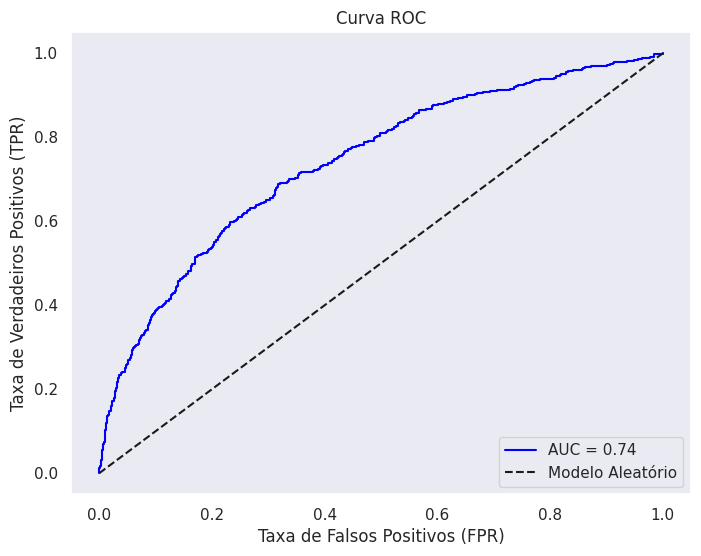

<Figure size 640x480 with 0 Axes>

In [88]:
# Probabilidades previstas (classe positiva)
y_prob = ridge_model.predict_proba(X_teste)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)
auc = roc_auc_score(y_teste, y_prob)

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Modelo Aleatório')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
plt.tight_layout();

A Curva ROC (Receiver Operating Characteristic) é uma métrica de avaliação muito utilizada para modelos de classificação binária. Ela mede a capacidade do modelo em diferenciar entre as classes positiva e negativa.


O modelo apresenta um AUC = 0,74, o que indica uma boa capacidade de classificação. Isso significa que o modelo tem 74% de chance de classificar corretamente um cliente que fará churn em comparação com um cliente que não fará.

In [92]:
# Impressão das métricas de classificação
y_pred = ridge_model.predict(X_teste)
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1991
           1       0.40      0.59      0.47       509

    accuracy                           0.73      2500
   macro avg       0.64      0.68      0.65      2500
weighted avg       0.78      0.73      0.75      2500



O relatório acima indica que o modelo apresenta um **bom desempenho na Classe 0** (clientes que **não realizaram churn**). O modelo atingiu um **recall de 77%**, o que significa que ele consegue identificar corretamente **77%** dos clientes que realmente **permaneceram** no banco. Além disso, a **precisão de 88%** mostra que, entre todos os clientes classificados como **não churn**, **88%** foram corretamente identificados.  

Por outro lado, o desempenho na **Classe 1** (clientes que **realizaram churn**) foi **moderado**. O **recall de 59%** indica que o modelo conseguiu identificar mais da metade dos clientes que realmente **saíram** do banco. No entanto, a **precisão de 40%** revela que apenas **40%** das previsões de churn estavam corretas, indicando uma quantidade considerável de **falsos positivos**.

A alta taxa de **falsos positivos** implica que muitos clientes que **não fariam churn** foram classificados incorretamente como **propensos a sair**, o que pode levar a **custos desnecessários** em campanhas de retenção. Por outro lado, a taxa de **falsos negativos** também merece atenção, pois clientes que realmente estão insatisfeitos podem **não ser identificados**, resultando em **perda de clientes**.


Especificidade: 0.77


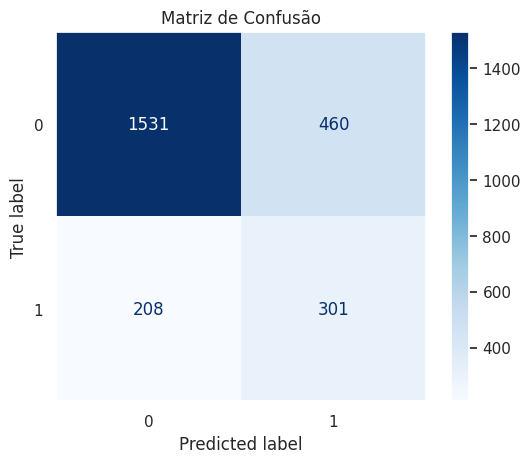

In [91]:
# Matriz de confusão
cm = confusion_matrix(y_teste, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Especificidade: {specificity:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ridge_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.grid(False)
plt.show()

Verdadeiros Negativos (TN): 1531 -> O modelo corretamente identificou 1520 clientes que permaneceram.

Falsos Positivos      (FP): 460  -> O modelo erroneamente classificou 460 clientes que permaneceram como churn.

Falsos Negativos      (FN): 208  -> O modelo falhou ao identificar 208 clientes que saíram, classificando-os como permanecendo.

Verdadeiros Positivos (TP): 301 -> O modelo corretamente identificou 301 clientes que saíram.

A **matriz de confusão** é uma ferramenta essencial para identificar quais tipos de erros o modelo cometeu e avaliar o impacto dessas falhas no negócio. No contexto de previsão de **churn bancário**, é fundamental compreender as consequências de cada tipo de erro para definir estratégias mais eficazes de retenção de clientes.

**Erro Tipo I (Falso Positivo - FP)**
Ocorre quando o modelo **prediz que o cliente fará churn**, mas, na realidade, ele **permaneceria** na instituição.

**Impacto no Negócio:**  
- A empresa pode direcionar **recursos desnecessários** para reter clientes que **não pretendem sair**, como **ofertas de desconto**, **campanhas de marketing** ou **benefícios exclusivos**.  

**Erro Tipo II (Falso Negativo - FN)**
Ocorre quando o modelo **prediz que o cliente permanecerá**, mas ele **abandona** o banco.

**Impacto no Negócio:**  
- Esse erro é **mais crítico**, pois o banco **perde clientes** sem implementar estratégias de retenção.  
- Clientes insatisfeitos poderiam ser retidos com **intervenções personalizadas**, como **condições diferenciadas de crédito**, **produtos financeiros personalizados** ou **melhorias no atendimento**.

A especificidade (também conhecida como taxa de verdadeiros negativos) mede a proporção de instâncias negativas que foram corretamente identificadas pelo modelo.

Especificidade = Verdadeiros Negativos / (Verdadeiros Negativos + Falsos Positivos)

Com esse valor de 77% significa que modelo errou ao classificar como positivo 23% das instâncias que eram negativas (23% de Falsos Positivos). Incoreu no erro do tipo ii.

  ## **Conclusões**

  O modelo de **Regressão Logística com Regularização** desenvolvido para prever o **churn de clientes bancários** apresentou desempenho satisfatório em sua **primeira versão**. Com uma **acurácia de 73%**, o modelo demonstrou bom desempenho na identificação de clientes que **não fariam churn** (**Classe 0**), com **77% de recall** e **88% de precisão**. No entanto, o desempenho na **Classe 1** (clientes que **realizaram churn**) foi **moderado**, com **59% de recall** e **40% de precisão**, indicando a necessidade de melhorias na detecção de clientes propensos a sair. A **Curva ROC** com **AUC de 0.74** reforça a capacidade razoável de discriminação do modelo.

Destaca-se que este modelo representa apenas a **primeira iteração** dentro da metodologia **CRISP-DM**, que é **iterativa** e permite retornos às etapas anteriores para refinamentos. Assim, ajustes como a **engenharia de atributos**, **balanceamento de classes** e testes com **novos algoritmos** serão explorados em versões futuras para aprimorar a **performance preditiva** e a **efetividade** das estratégias de **retenção de clientes**.

___